In [10]:
!pip install catboost
# if neceessary then uncomment it

Importing the Dependencies

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from scipy import stats
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error
#import xgboost
import os
# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance

import joblib
sns.set()
plt.style.use('ggplot')
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
#import xgboost
import os
# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance

import joblib
sns.set()
plt.style.use('ggplot')
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

In [12]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [13]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [15]:
train_df.dtypes[train_df.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

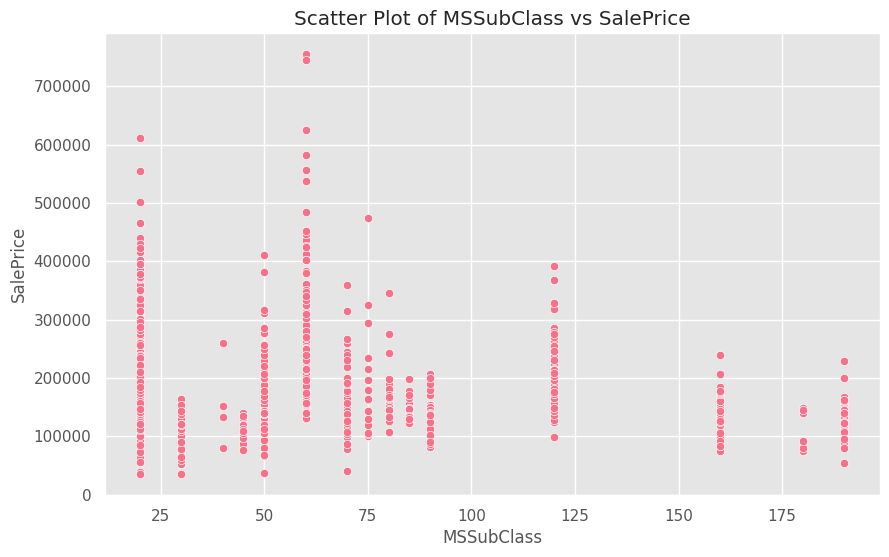

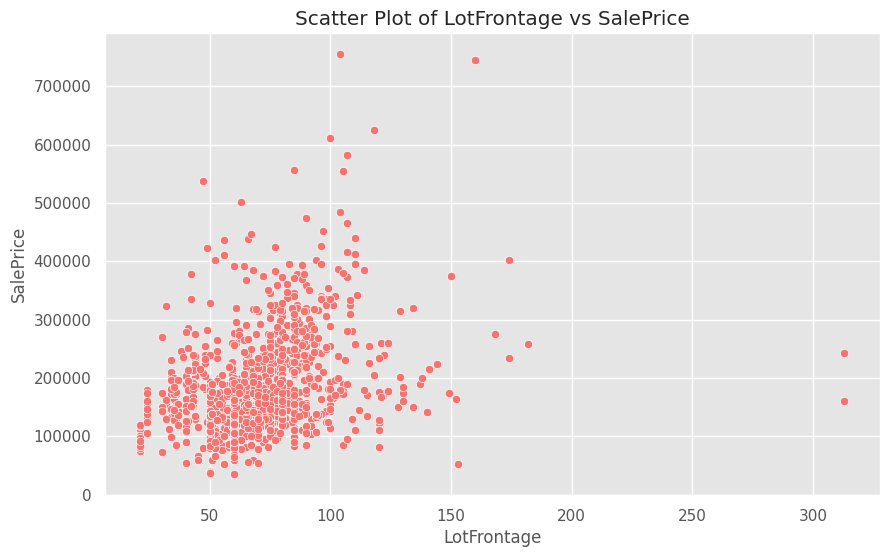

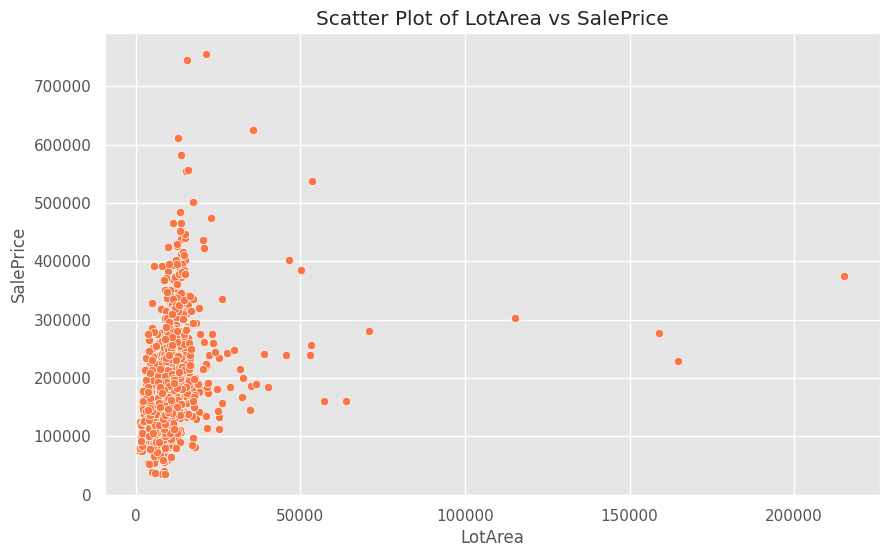

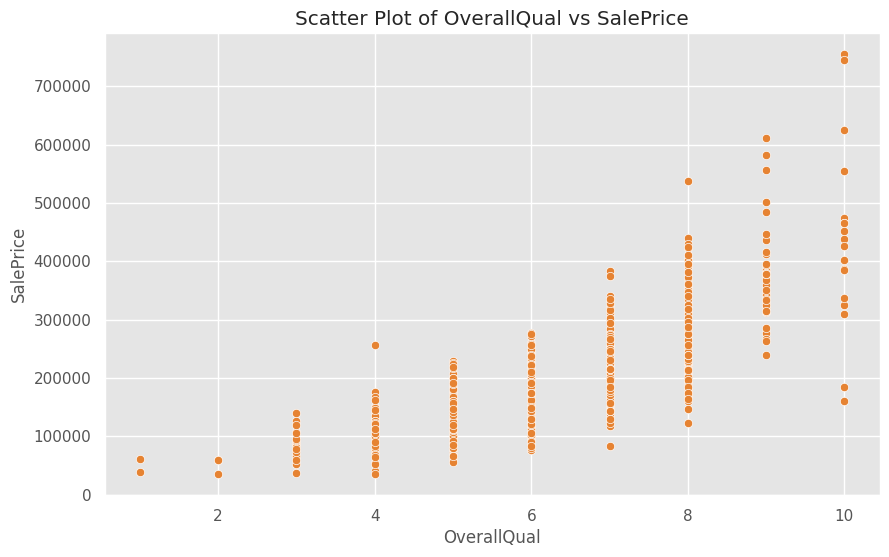

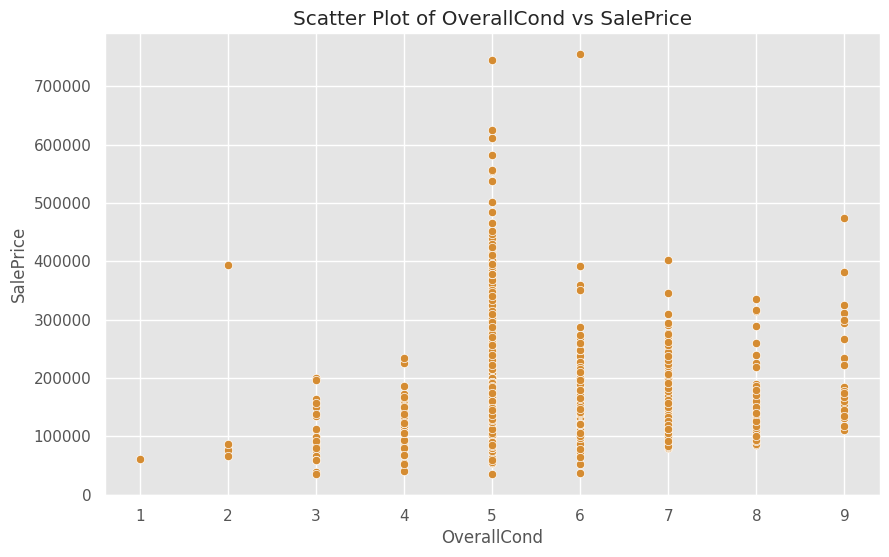

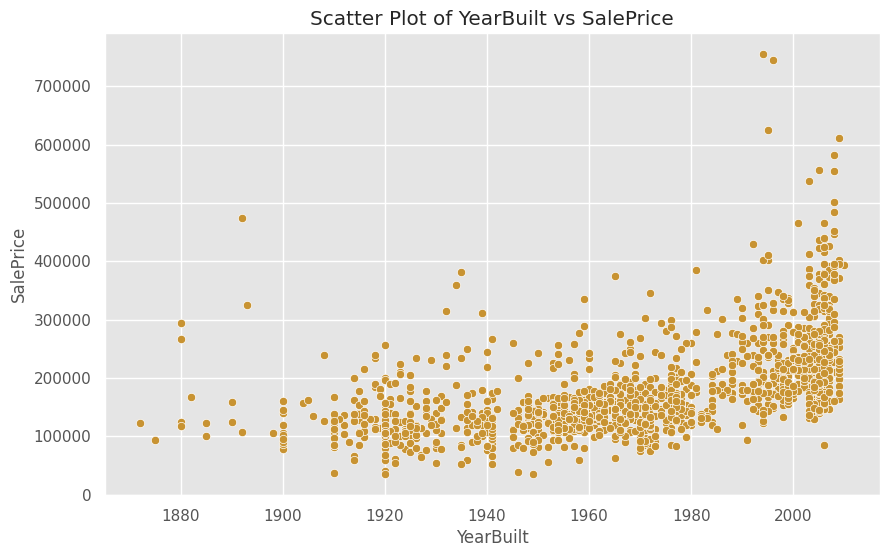

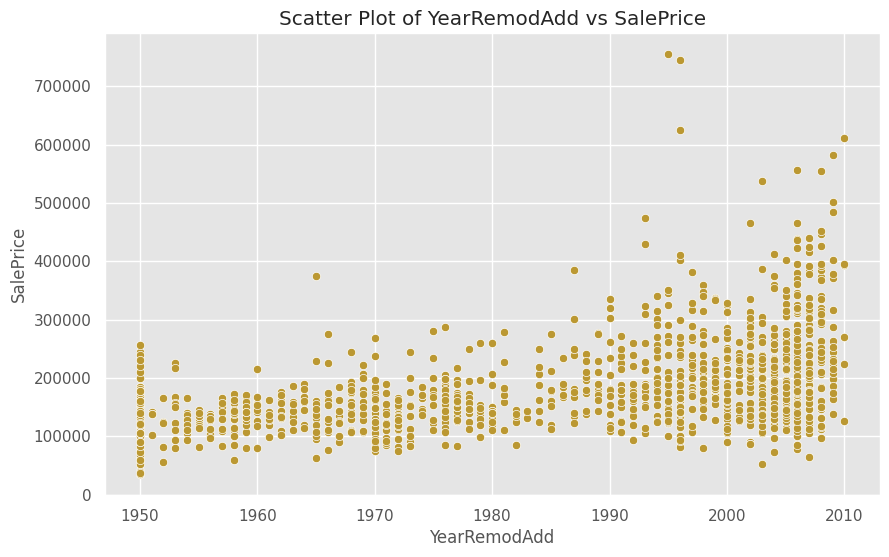

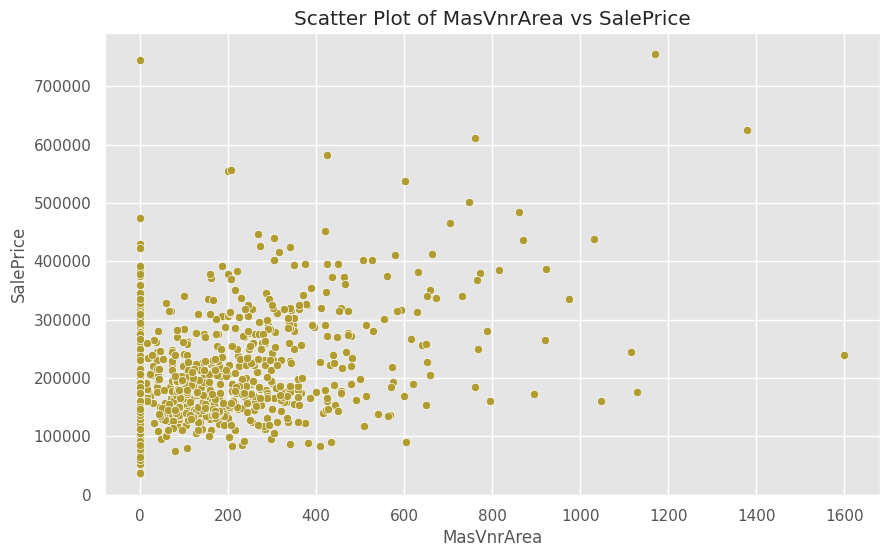

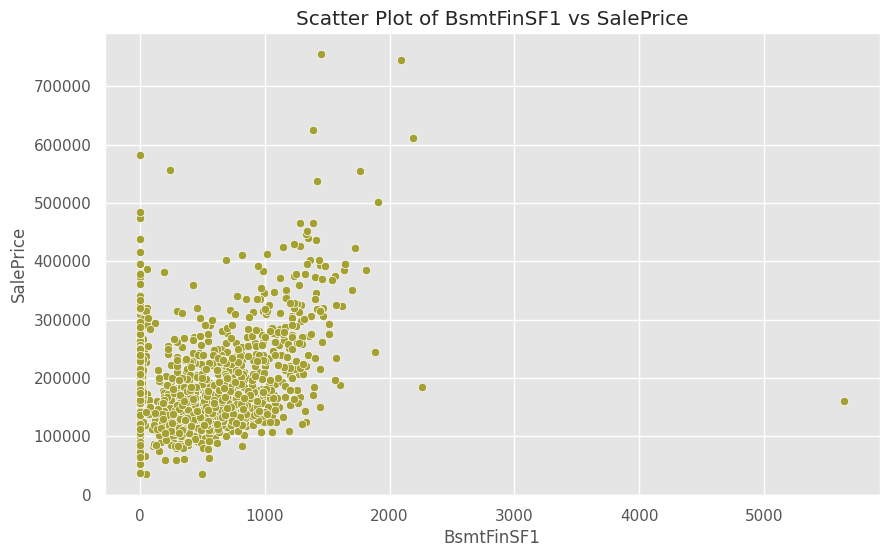

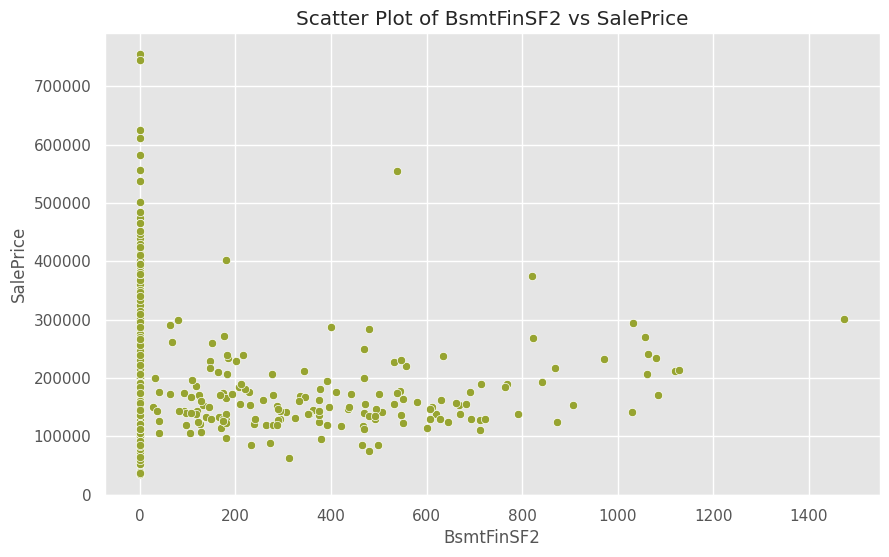

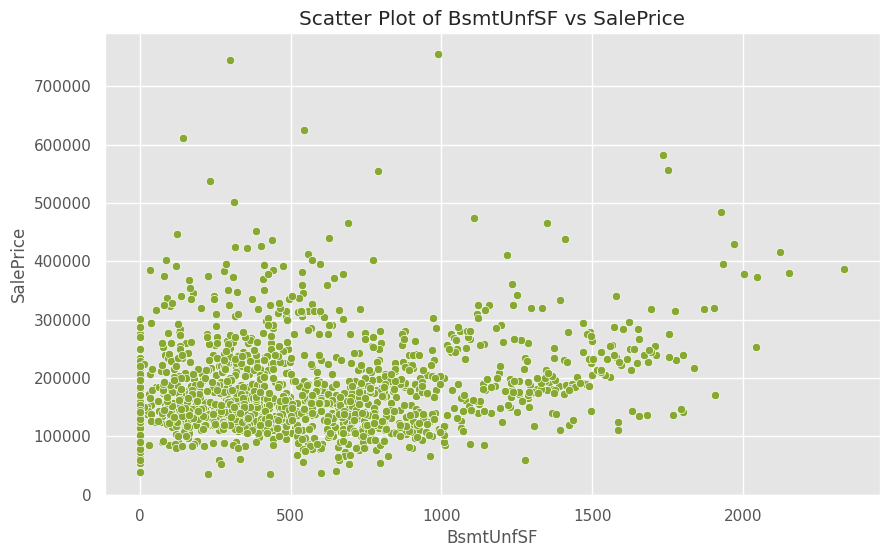

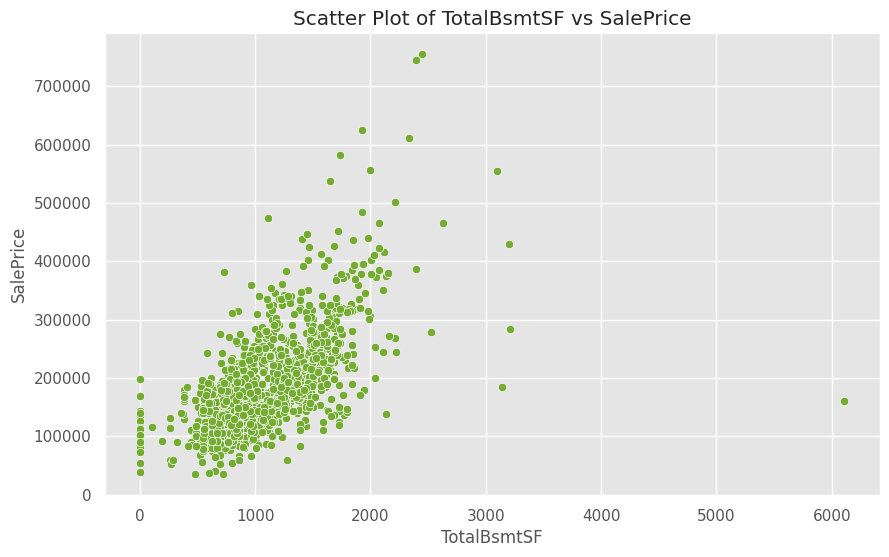

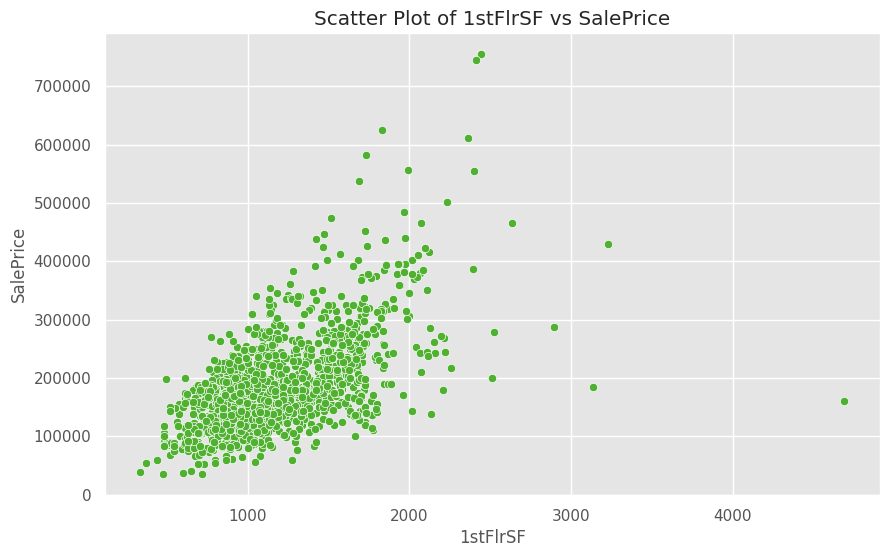

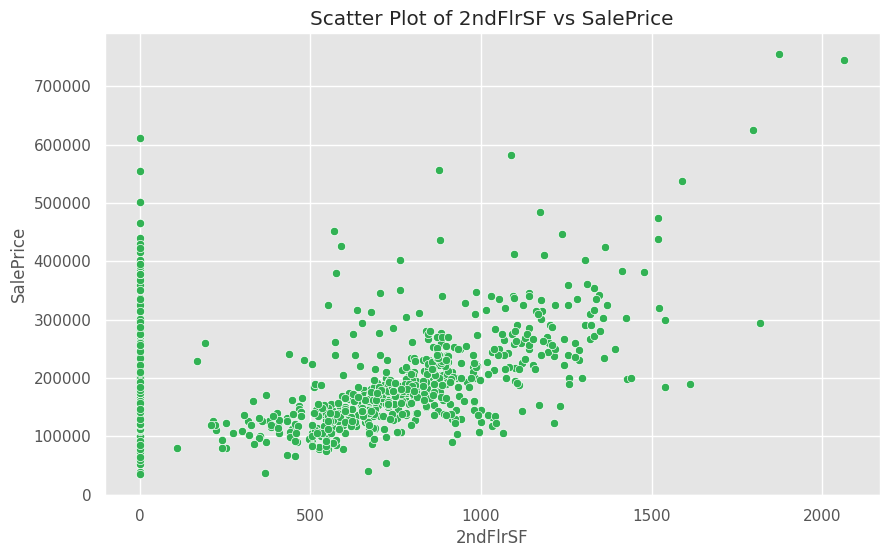

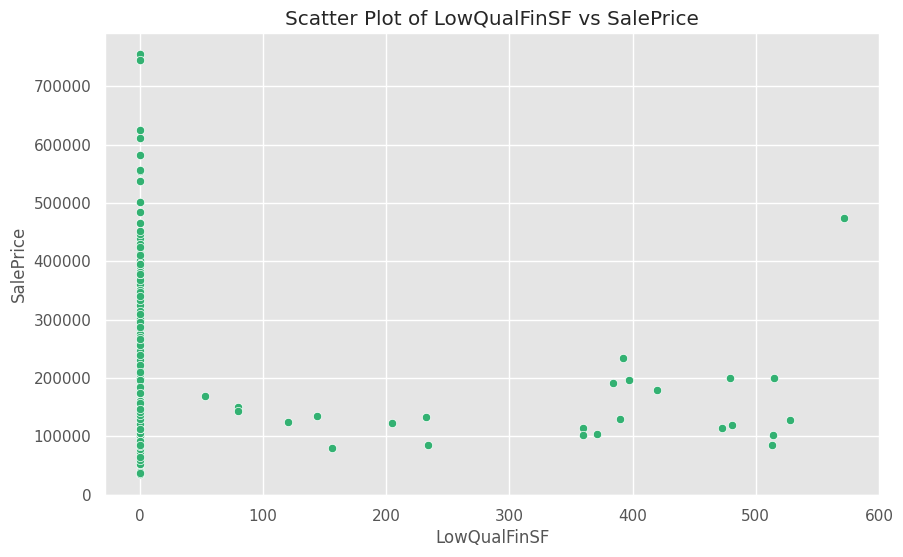

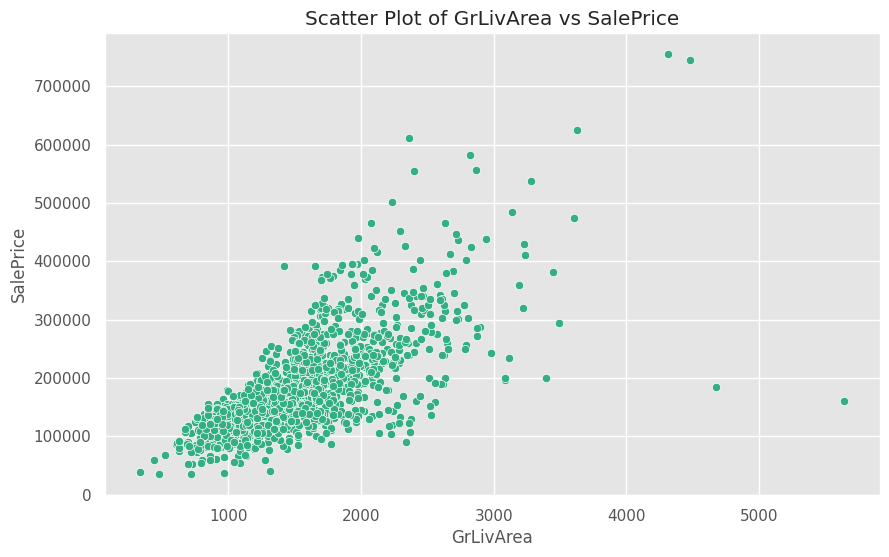

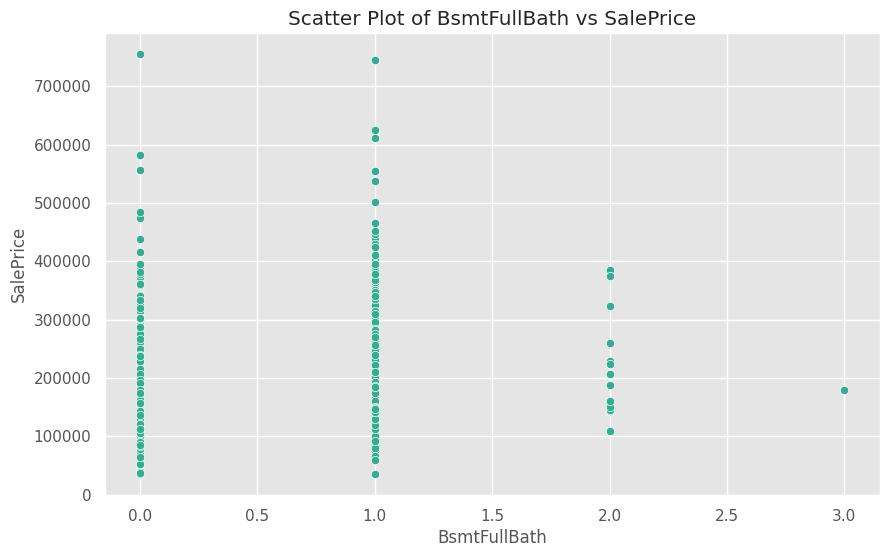

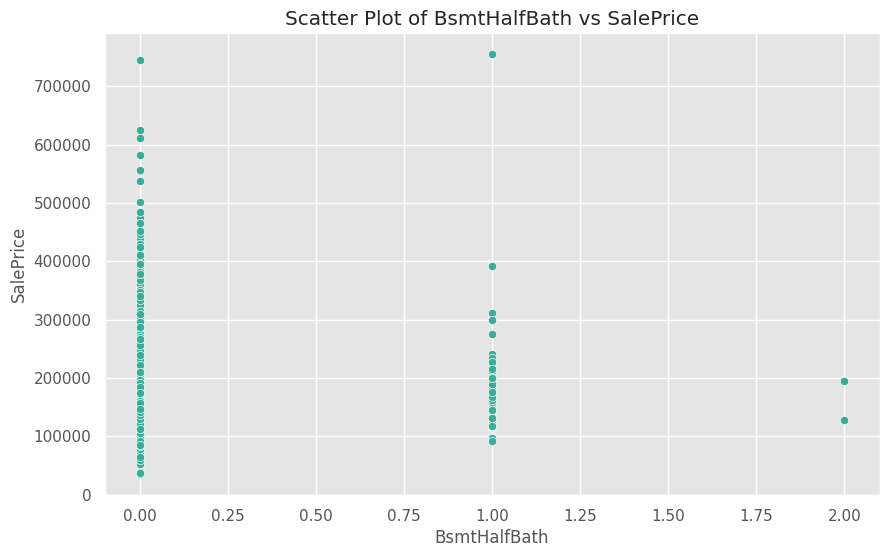

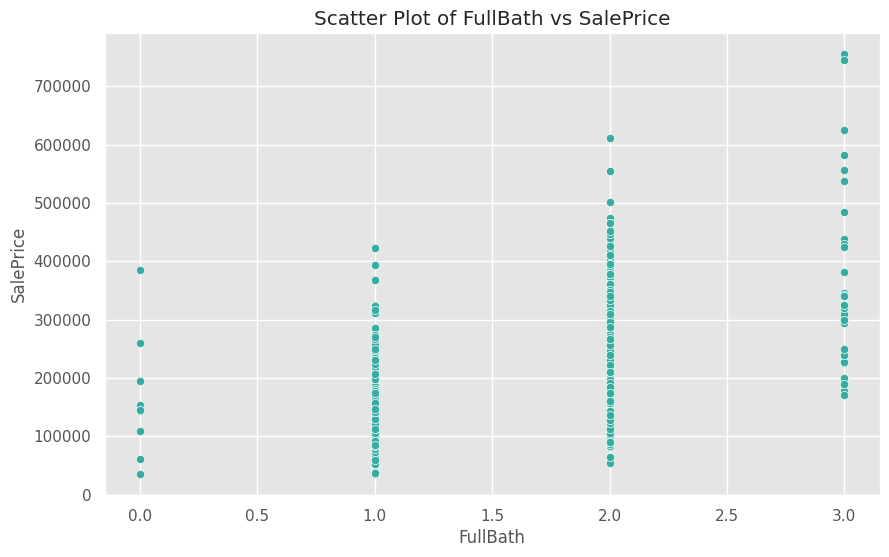

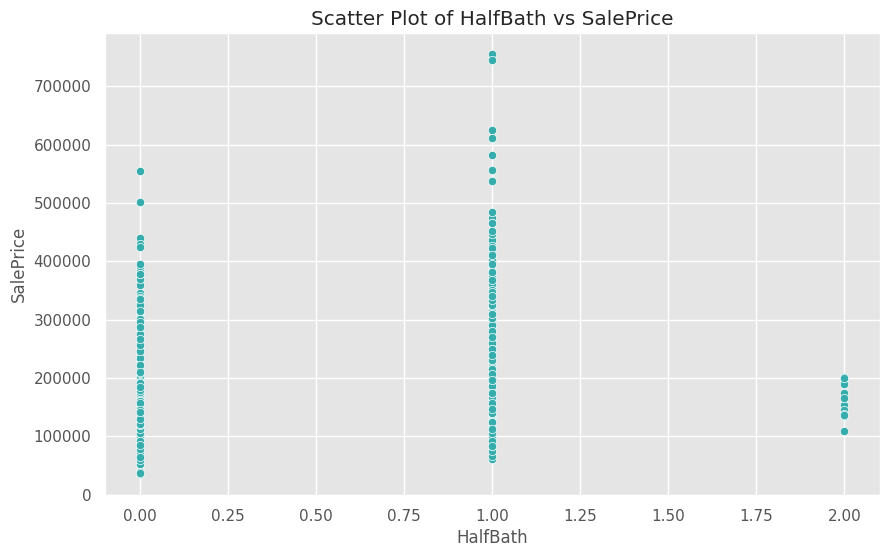

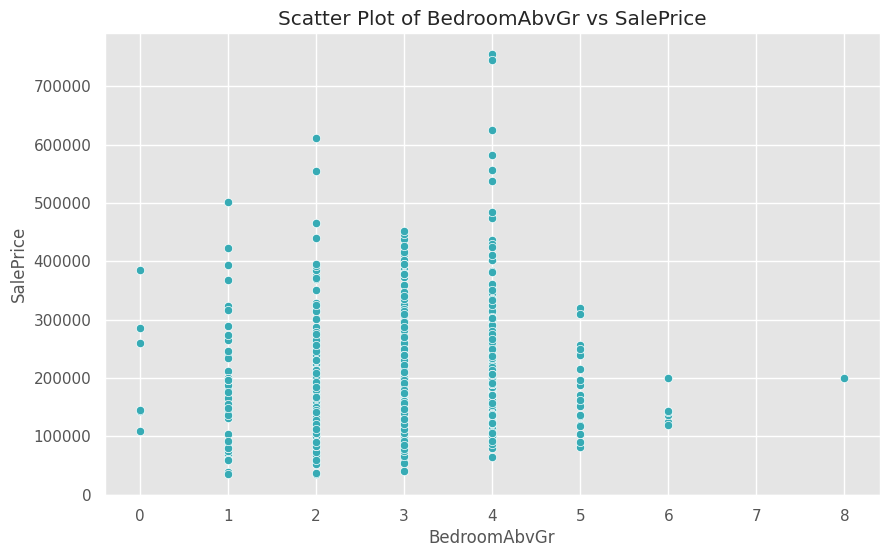

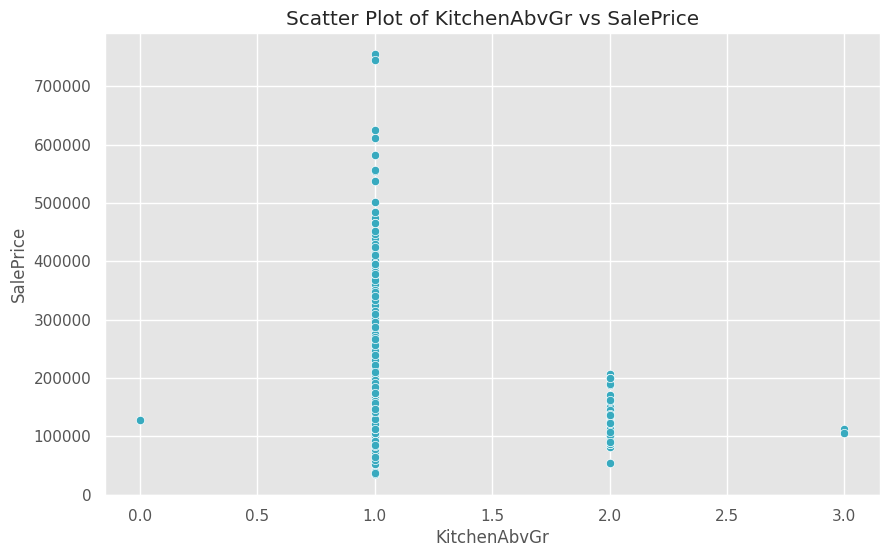

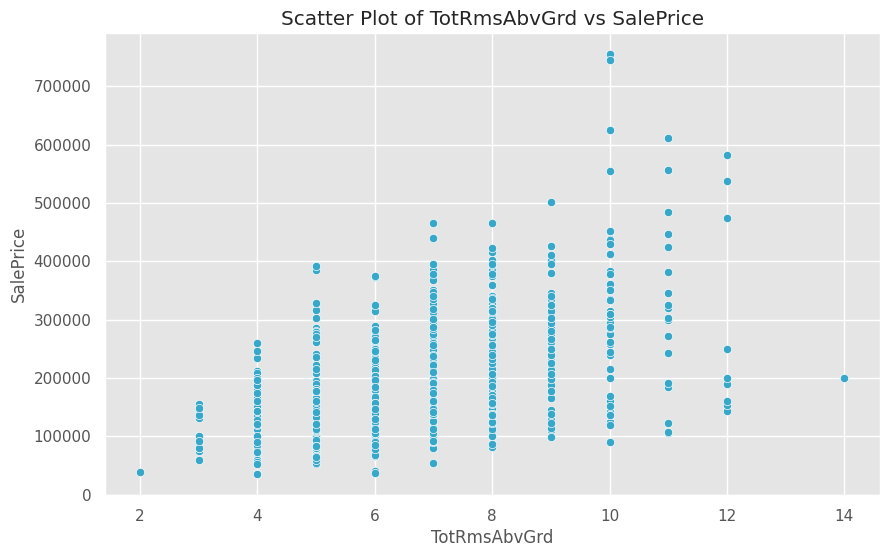

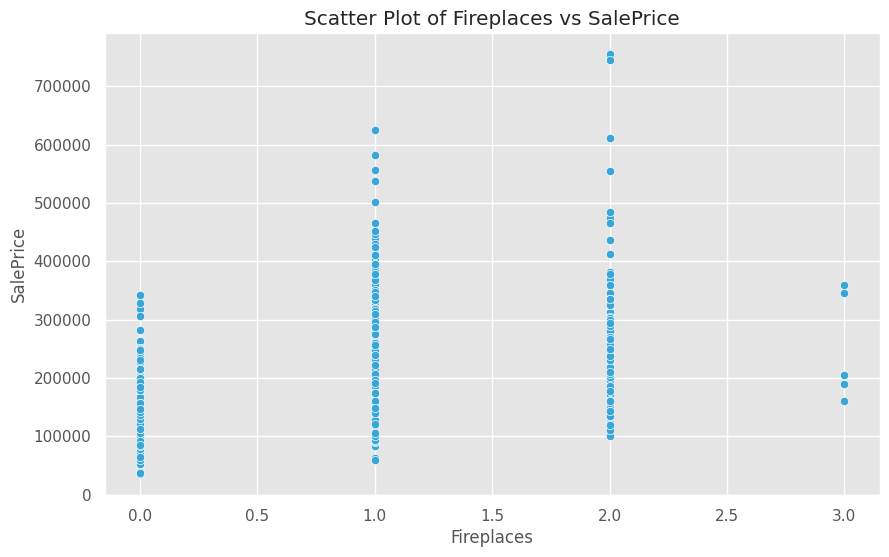

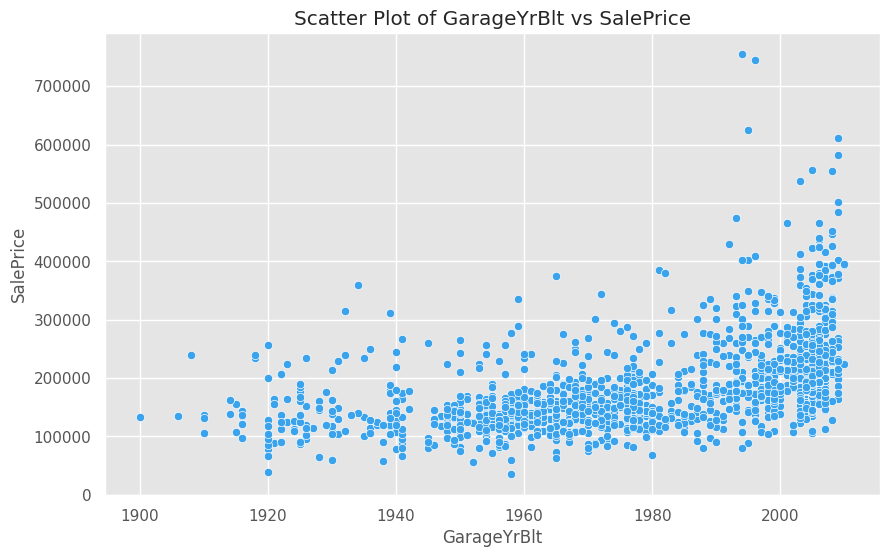

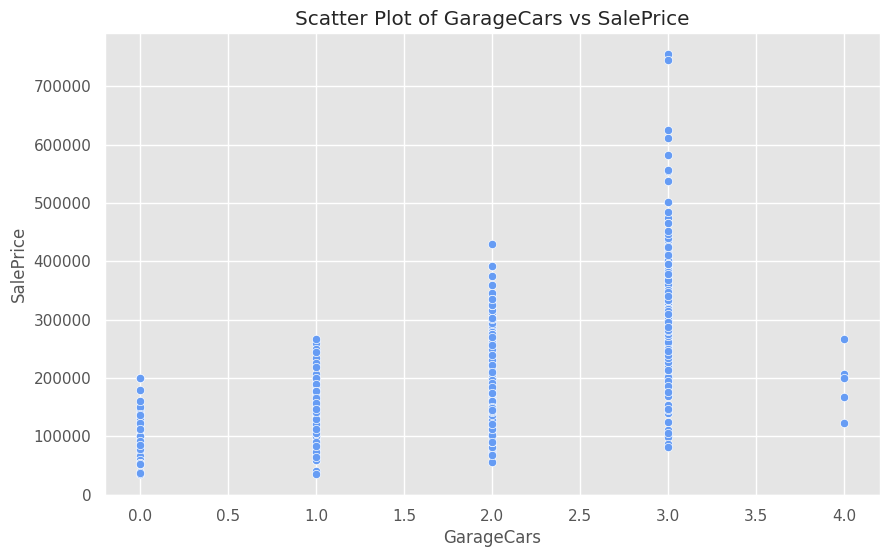

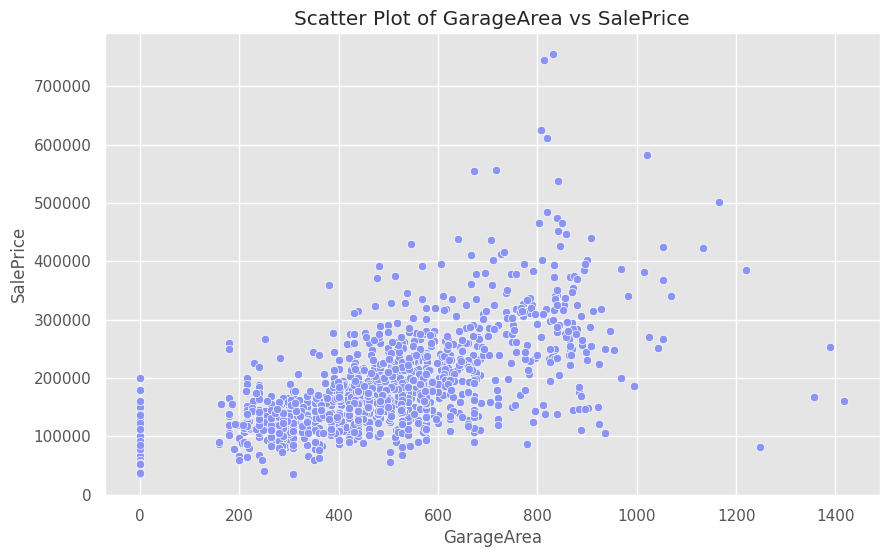

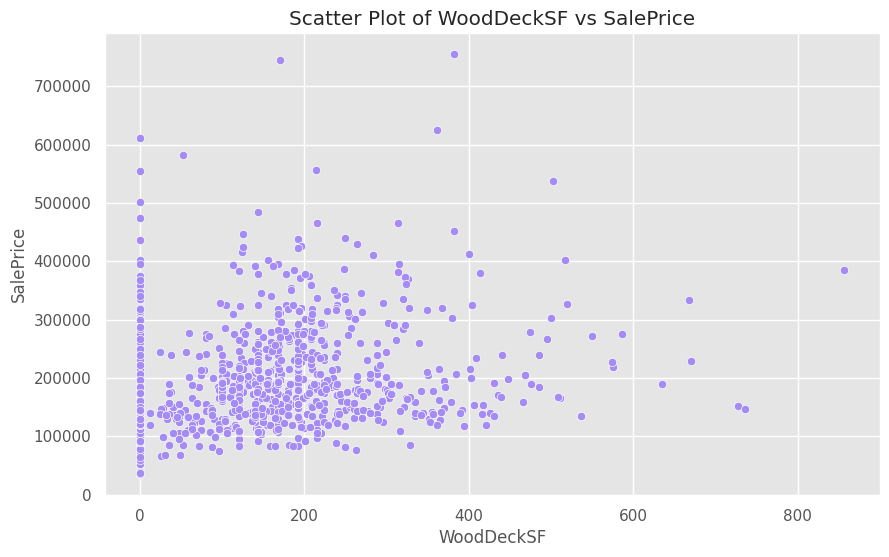

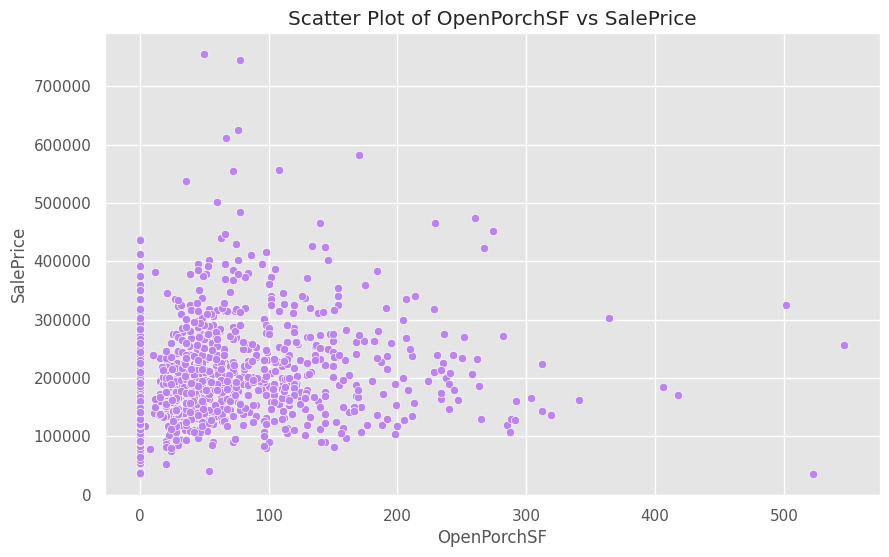

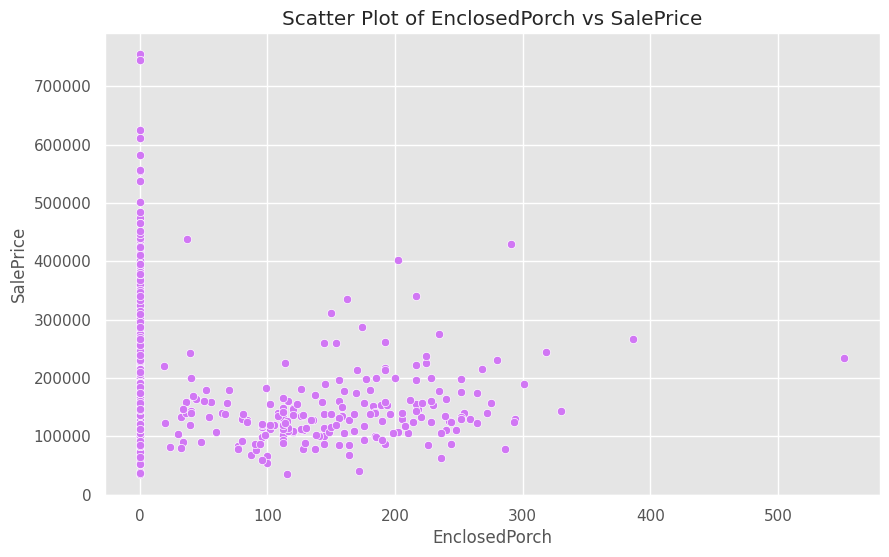

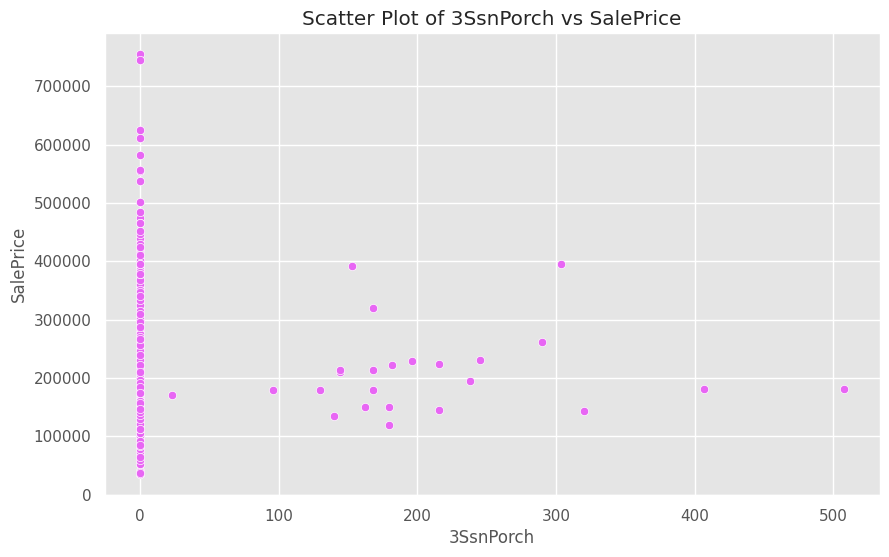

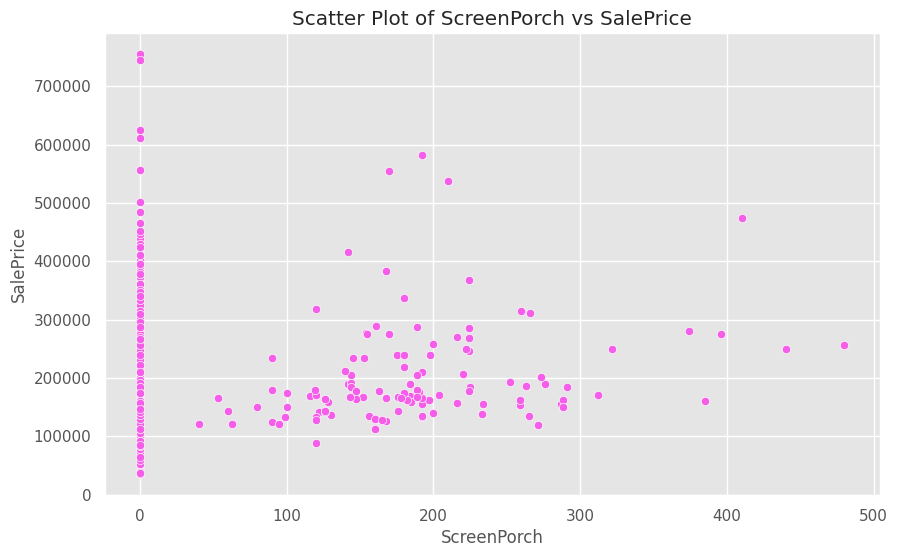

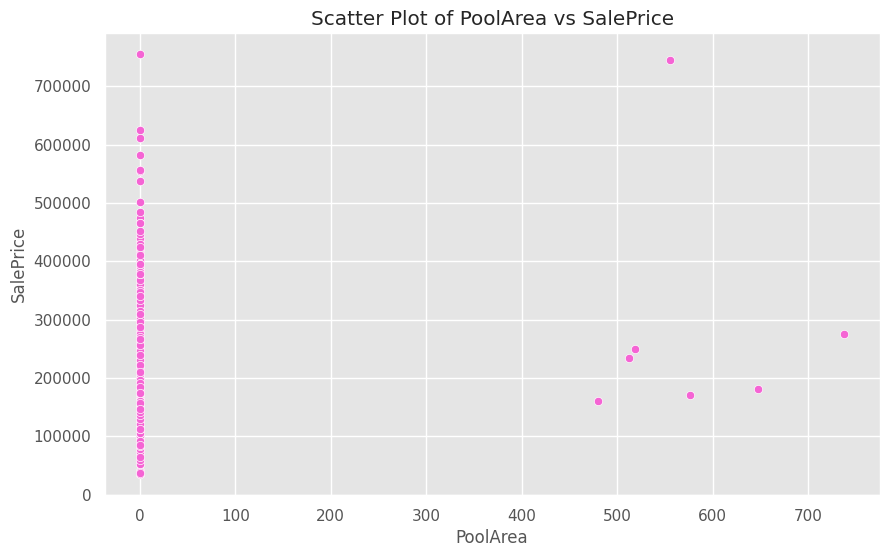

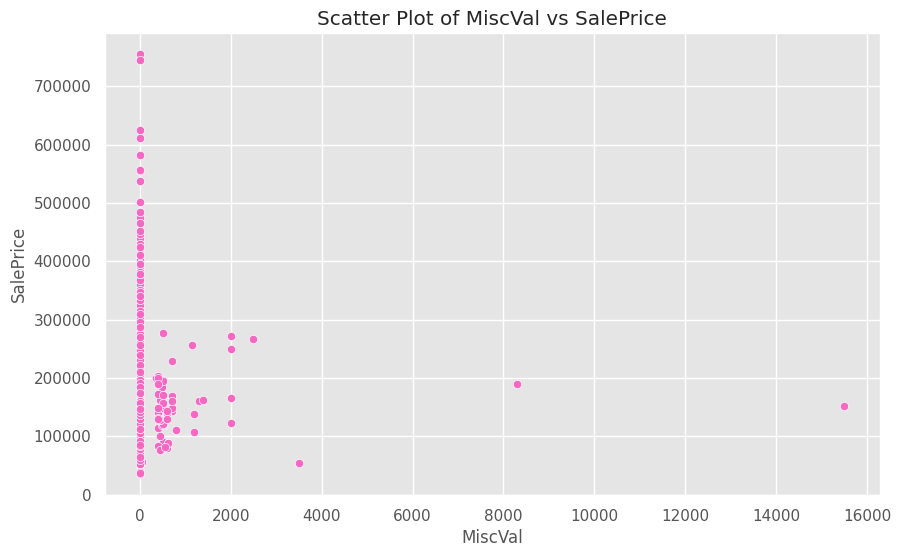

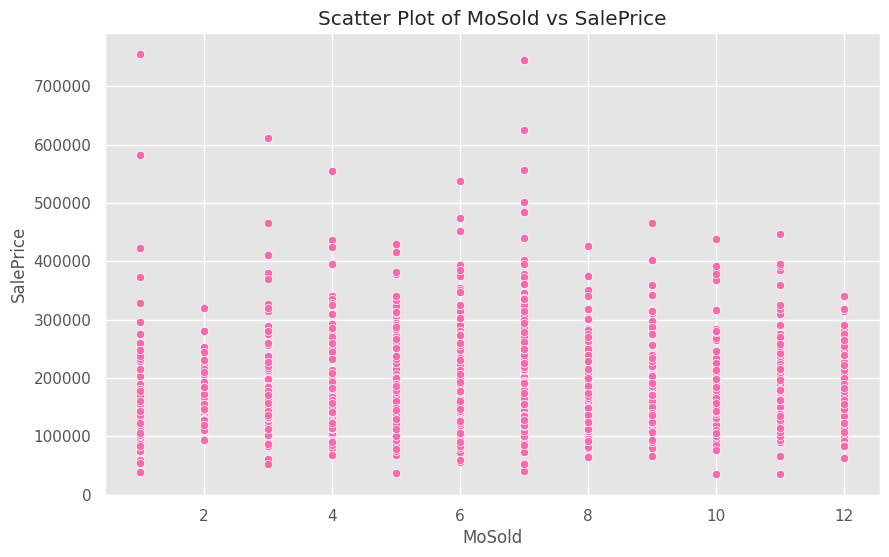

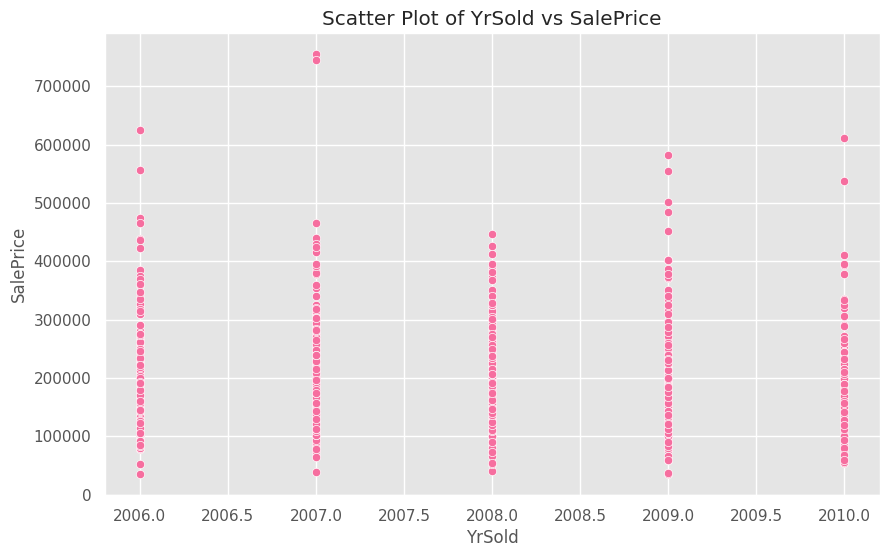

In [16]:
# List of features to plot against SalePrice
features = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
    'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
    'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'
]

# List of colors for different features
colors = sns.color_palette('husl', len(features))

# Create scatter plots
for feature, color in zip(features, colors):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=train_df, x=feature, y='SalePrice', color=color)
    plt.title(f'Scatter Plot of {feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()


Missing Values Count:
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtUnfSF          0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
LowQualFinSF       0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu        0
GarageType         0
GarageFinish       0
GarageCars         0
GarageQual  

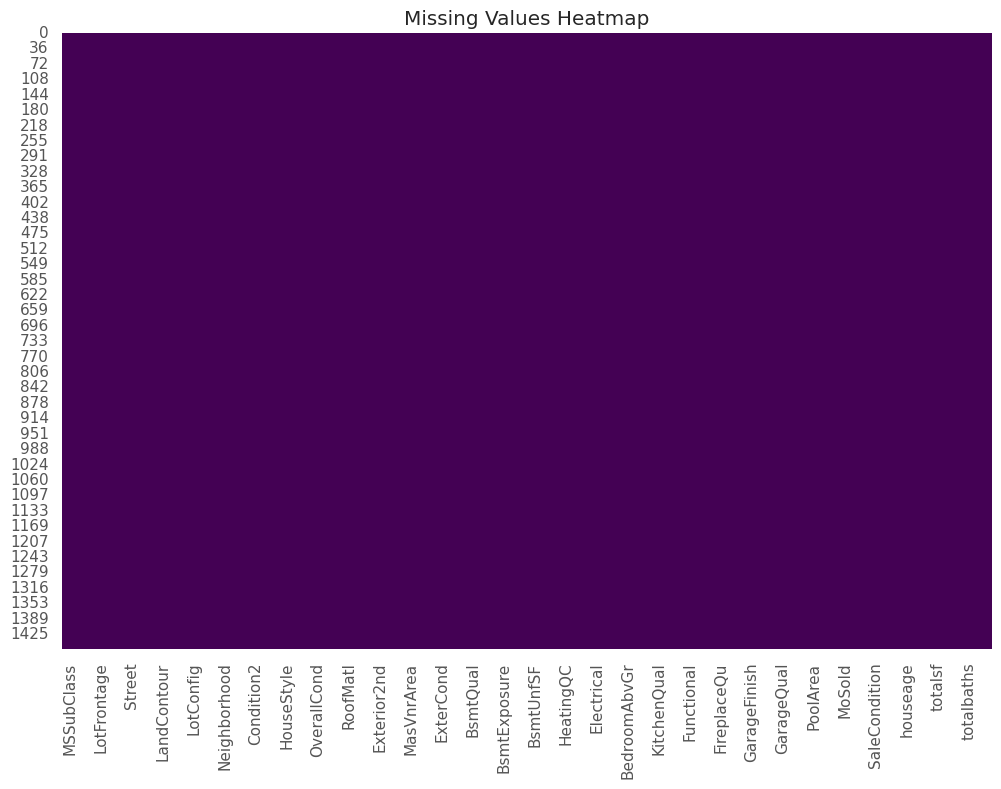

In [172]:
# Check for missing values
print("Missing Values Count:")
print(train_df.isnull().sum())

# Visualize missing values (if needed)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


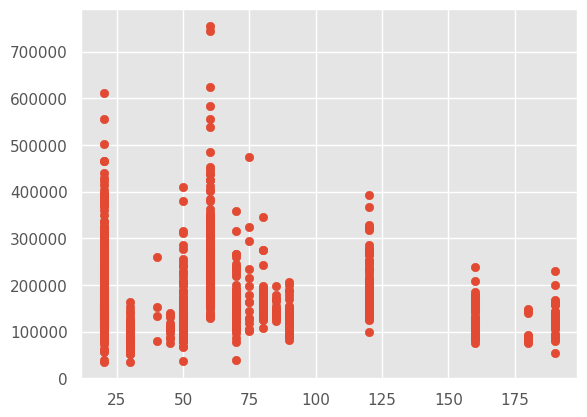

In [17]:
plt.scatter(x='MSSubClass', y='SalePrice', data=train_df)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
934    935          20       RL        313.0    27650   Pave   NaN      IR2   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
934          HLS    AllPub  ...        0    NaN   NaN         NaN       0   
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
934      11   2008        WD         Normal     242000  
1298      1   2008       New        Partial     160000  

[2 rows x 81 columns]

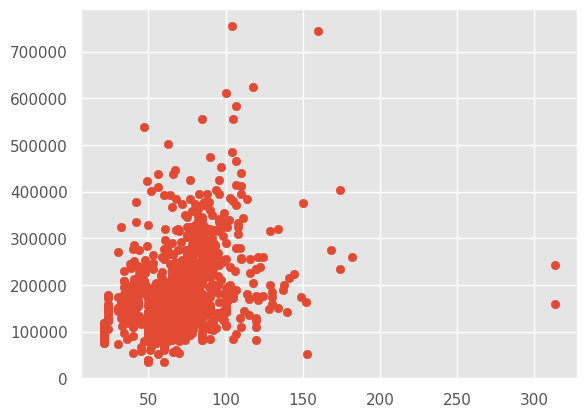

In [18]:
plt.scatter(x='LotFrontage', y='SalePrice', data=train_df)
train_df.query('LotFrontage > 300')
#Drop 935, 1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
249    250          50       RL          NaN   159000   Pave   NaN      IR2   
313    314          20       RL        150.0   215245   Pave   NaN      IR3   
335    336         190       RL          NaN   164660   Grvl   NaN      IR1   
451    452          20       RL         62.0    70761   Pave   NaN      IR1   
706    707          20       RL          NaN   115149   Pave   NaN      IR2   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
1396  1397          20       RL          NaN    57200   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
249          Low    AllPub  ...        0    NaN   NaN        Shed     500   
313          Low    AllPub  ...        0    NaN   NaN         NaN       0   
335          HLS    AllPub  ...        0    NaN   NaN        Shed     700   
451          Low    AllPub  ...        0    NaN   NaN         NaN       0   
706          Low    AllPub  ...        0    NaN   NaN         NaN       0   
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   
1396         Bnk    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
249       6   2007        WD         Normal     277000  
313       6   2009        WD         Normal     375000  
335       8   2008        WD         Normal     228950  
451      12   2006        WD         Normal     280000  
706       6   2007        WD         Normal     302000  
1298      1   2008       New        Partial     160000  
1396      6   2010        WD         Normal     160000  

[7 rows x 81 columns]

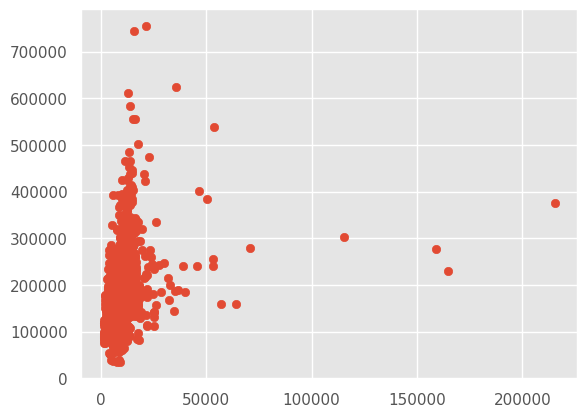

In [19]:
plt.scatter(x='LotArea', y='SalePrice', data=train_df)
train_df.query('LotArea > 55000')
# 250, 314, 336, 707
#maybe 1397

In [20]:

stats.zscore(train_df['LotArea']).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

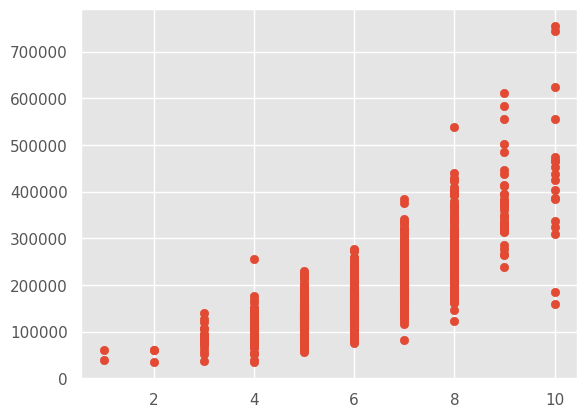

In [21]:
plt.scatter(x='OverallQual', y='SalePrice', data=train_df)

In [22]:
train_df.query('OverallQual == 10')
#maybe 524

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
58      59          60       RL         66.0    13682   Pave   NaN      IR2   
185    186          75       RM         90.0    22950   Pave   NaN      IR2   
224    225          20       RL        103.0    13472   Pave   NaN      Reg   
389    390          60       RL         96.0    12474   Pave   NaN      Reg   
440    441          20       RL        105.0    15431   Pave   NaN      Reg   
515    516          20       RL         94.0    12220   Pave   NaN      Reg   
523    524          60       RL        130.0    40094   Pave   NaN      IR1   
583    584          75       RM         75.0    13500   Pave   NaN      Reg   
591    592          60       RL         97.0    13478   Pave   NaN      IR1   
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
825    826          20       RL        114.0    14803   Pave   NaN      Reg   
994    995          20       RL         96.0    12456   Pave   NaN      Reg   
1169  1170          60       RL        118.0    35760   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1243  1244          20       RL        107.0    13891   Pave   NaN      Reg   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
1373  1374          20       RL          NaN    11400   Pave   NaN      Reg   
1442  1443          60       FV         85.0    11003   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
58           HLS    AllPub  ...        0    NaN    NaN         NaN       0   
185          Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   
224          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
389          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
440          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
515          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
523          Bnk    AllPub  ...        0    NaN    NaN         NaN       0   
583          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
591          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
691          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
825          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
994          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1169         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1182         Lvl    AllPub  ...      555     Ex  MnPrv         NaN       0   
1243         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1298         Bnk    AllPub  ...      480     Gd    NaN         NaN       0   
1373         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1442         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
58       10   2006       New        Partial     438780  
185       6   2006        WD         Normal     475000  
224       6   2009        WD         Normal     386250  
389       8   2008       New        Partial     426000  
440       4   2009        WD         Normal     555000  
515       9   2009       New        Partial     402861  
523      10   2007       New        Partial     184750  
583       7   2008        WD         Normal     325000  
591       6   2009     ConLI         Normal     451950  
691       1   2007        WD         Normal     755000  
825       6   2008       New        Partial     385000  
994       7   2009        WD         Normal     337500  
1169      7   2006        WD         Normal     625000  
1182      7   2007        WD        Abnorml     745000  
1243      9   2006       New        Partial     465000  
1298      1   2008       New        Partial     160000  
1373      3   2007        WD         Normal     466500

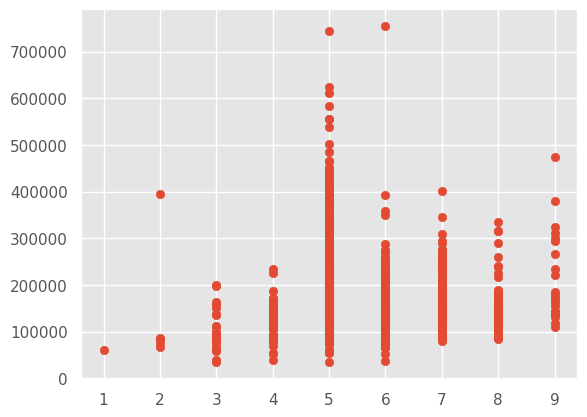

In [23]:
plt.scatter(x='OverallCond', y='SalePrice', data=train_df)

In [24]:
train_df.query('OverallCond == 2')
#379

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
88    89          50  C (all)        105.0     8470   Pave   NaN      IR1   
250  251          30       RL         55.0     5350   Pave   NaN      IR1   
378  379          20       RL         88.0    11394   Pave   NaN      Reg   
398  399          30       RM         60.0     8967   Pave   NaN      Reg   
676  677          70       RM         60.0     9600   Pave  Grvl      Reg   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
88          Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
250         Lvl    AllPub  ...        0    NaN   GdWo        Shed     450   
378         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
398         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
676         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
88      10   2009     ConLD        Abnorml      85000  
250      5   2010        WD         Normal      76500  
378      6   2010       New        Partial     394432  
398     11   2007        WD        Abnorml      67000  
676      5   2006        WD         Normal      87000  

[5 rows x 81 columns]

In [25]:
train_df.query('OverallCond == 5 & SalePrice > 700000')
#1183

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1182         Lvl    AllPub  ...      555     Ex  MnPrv         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1182      7   2007        WD        Abnorml     745000  

[1 rows x 81 columns]

In [26]:
train_df.query('OverallCond == 6 & SalePrice > 700000')
#692

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691  692          60       RL        104.0    21535   Pave   NaN      IR1   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
691         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
691      1   2007        WD         Normal     755000  

[1 rows x 81 columns]

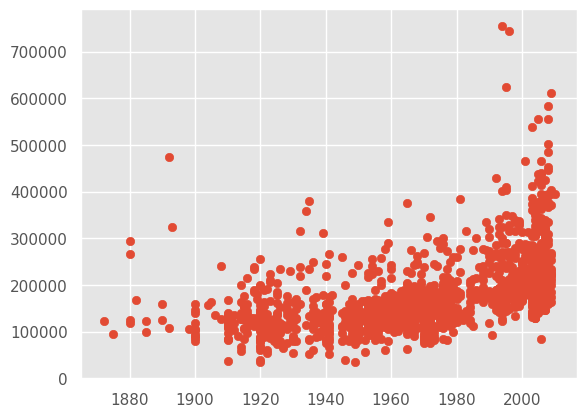

In [27]:
plt.scatter(x='YearBuilt', y='SalePrice', data=train_df)

In [28]:
train_df.query('YearBuilt < 1900 & SalePrice > 400000')
#186

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
185  186          75       RM         90.0    22950   Pave   NaN      IR2   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
185         Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
185      6   2006        WD         Normal     475000  

[1 rows x 81 columns]

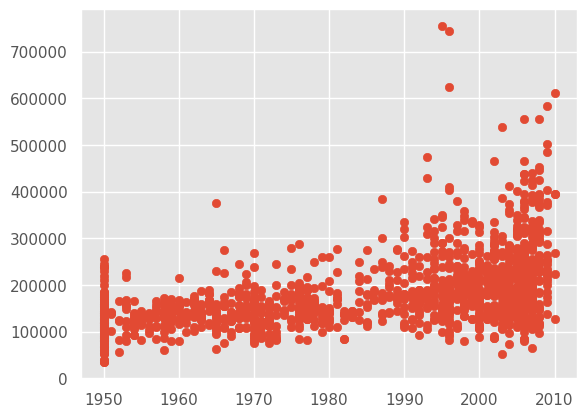

In [29]:
plt.scatter(x='YearRemodAdd', y='SalePrice', data=train_df)

In [30]:
train_df.query('YearRemodAdd < 1970 & SalePrice > 300000')
#314

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
313  314          20       RL        150.0   215245   Pave   NaN      IR3   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
313         Low    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
313      6   2009        WD         Normal     375000  

[1 rows x 81 columns]

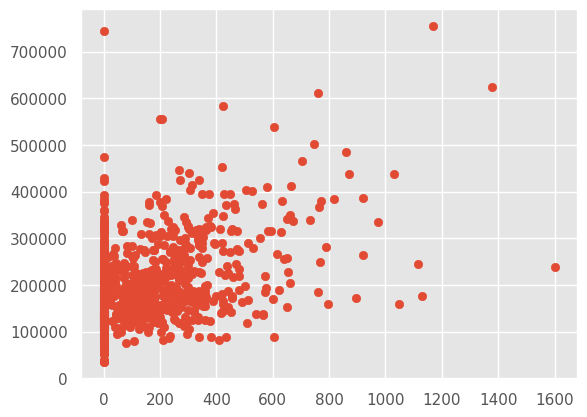

In [31]:
plt.scatter(x='MasVnrArea', y='SalePrice', data=train_df)

In [32]:
train_df.query('MasVnrArea > 1500')
#298

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
297  298          60       FV         66.0     7399   Pave  Pave      IR1   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
297         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
297      6   2007        WD         Normal     239000  

[1 rows x 81 columns]

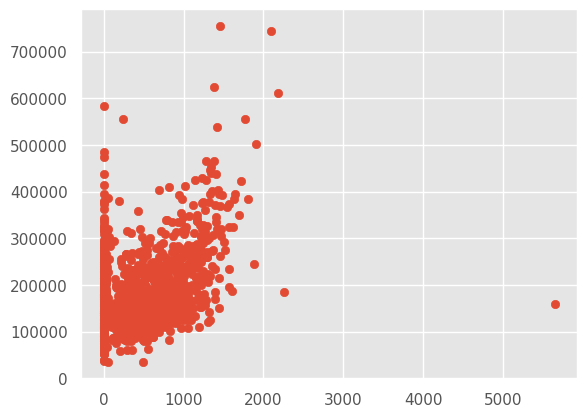

In [33]:
plt.scatter(x='BsmtFinSF1', y='SalePrice', data=train_df)

In [34]:
train_df.query('BsmtFinSF1 > 5000')
#1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1298      1   2008       New        Partial     160000  

[1 rows x 81 columns]

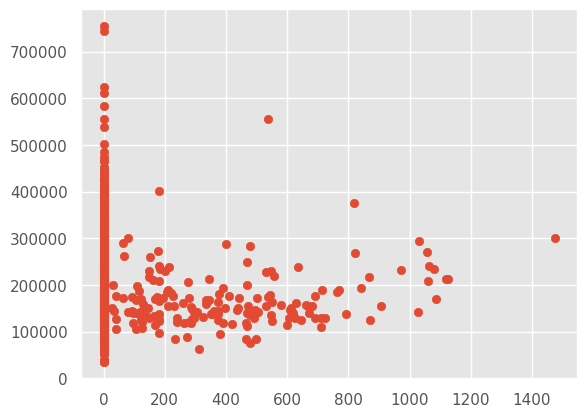

In [35]:
plt.scatter(x='BsmtFinSF2', y='SalePrice', data=train_df)

In [36]:
train_df.query('BsmtFinSF2 > 400 & SalePrice > 500000')
#441

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
440  441          20       RL        105.0    15431   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
440         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
440      4   2009        WD         Normal     555000  

[1 rows x 81 columns]

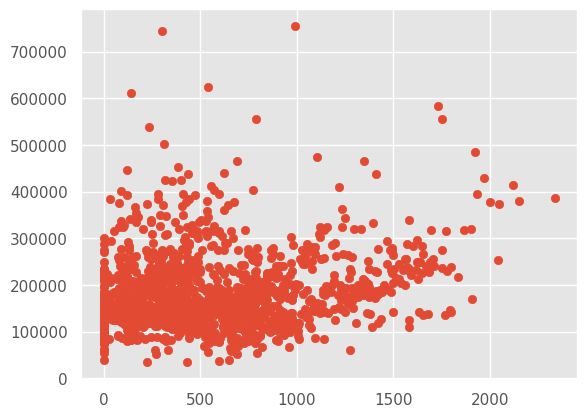

In [37]:
plt.scatter(x='BsmtUnfSF', y='SalePrice', data=train_df)

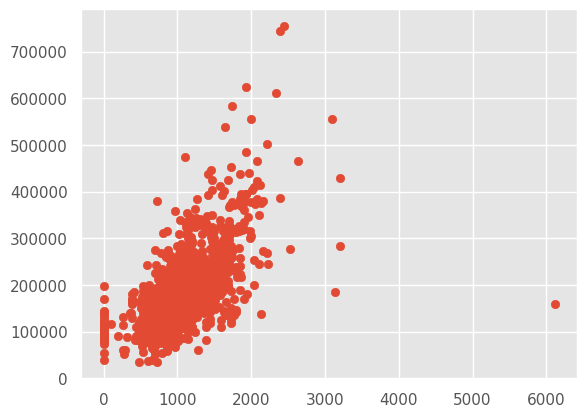

In [38]:
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=train_df)

In [39]:
train_df.query('TotalBsmtSF > 5000')
#1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1298      1   2008       New        Partial     160000  

[1 rows x 81 columns]

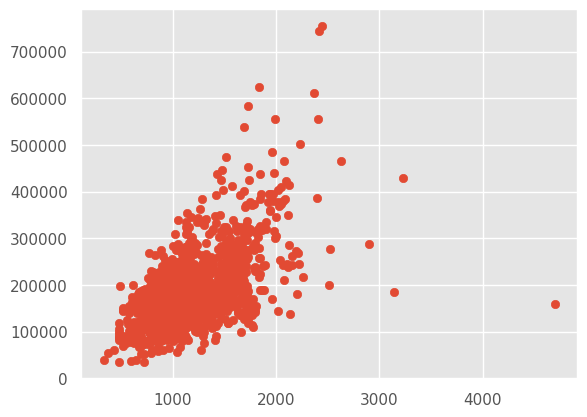

In [40]:
plt.scatter(x='1stFlrSF', y='SalePrice', data=train_df)

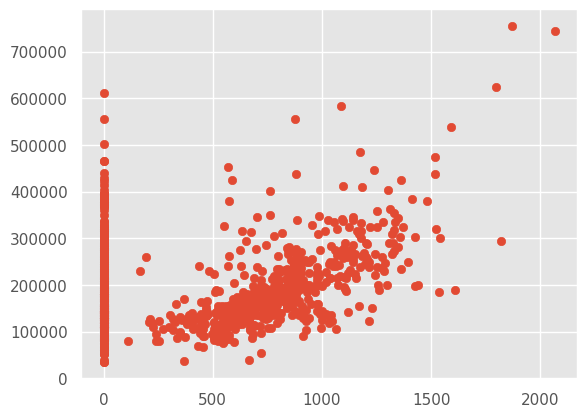

In [41]:
plt.scatter(x='2ndFlrSF', y='SalePrice', data=train_df)

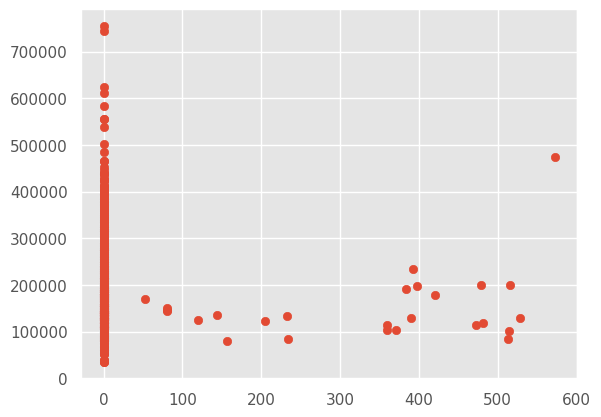

In [42]:
plt.scatter(x='LowQualFinSF', y='SalePrice', data=train_df)

In [43]:
train_df.query('LowQualFinSF > 500')
#186

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
88      89          50  C (all)        105.0     8470   Pave   NaN      IR1   
170    171          50       RM          NaN    12358   Pave   NaN      IR1   
185    186          75       RM         90.0    22950   Pave   NaN      IR2   
635    636         190       RH         60.0    10896   Pave  Pave      Reg   
1009  1010          50       RL         60.0     6000   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
88           Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
170          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
185          Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   
635          Bnk    AllPub  ...        0    NaN    NaN         NaN       0   
1009         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
88       10   2009     ConLD        Abnorml      85000  
170       5   2007        WD         Normal     128500  
185       6   2006        WD         Normal     475000  
635       3   2007        WD        Abnorml     200000  
1009      6   2006        WD         Normal     102000  

[5 rows x 81 columns]

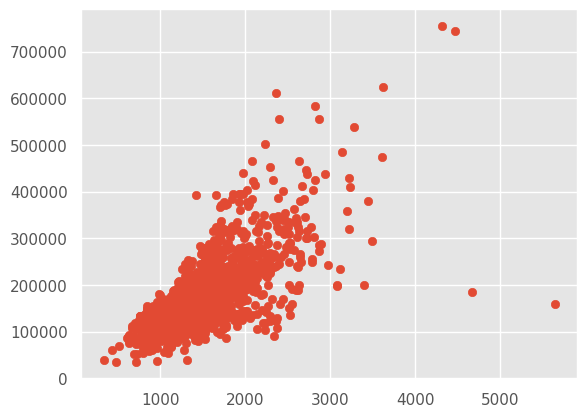

In [44]:
plt.scatter(x='GrLivArea', y='SalePrice', data=train_df)

In [45]:
train_df.query('GrLivArea > 4400')
#524, 1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524          60       RL        130.0    40094   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
523          Bnk    AllPub  ...        0    NaN    NaN         NaN       0   
1182         Lvl    AllPub  ...      555     Ex  MnPrv         NaN       0   
1298         Bnk    AllPub  ...      480     Gd    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
523      10   2007       New        Partial     184750  
1182      7   2007        WD        Abnorml     745000  
1298      1   2008       New        Partial     160000  

[3 rows x 81 columns]

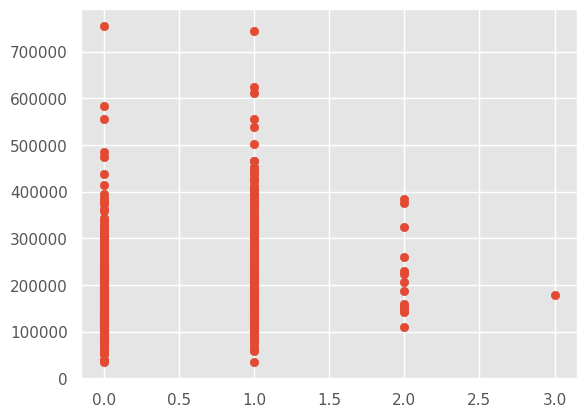

In [46]:
plt.scatter(x='BsmtFullBath', y='SalePrice', data=train_df)

In [47]:
train_df.query('BsmtFullBath == 3')
#739

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
738  739          90       RL         60.0    10800   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
738         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
738      3   2009        WD         Alloca     179000  

[1 rows x 81 columns]

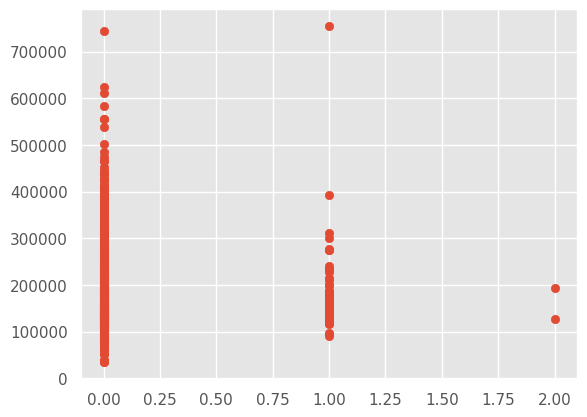

In [48]:
plt.scatter(x='BsmtHalfBath', y='SalePrice', data=train_df)

In [49]:
stats.zscore(train_df['BsmtHalfBath']).unique()

array([-0.24106104,  3.94880935,  8.13867973])

In [50]:
train_df.query('BsmtHalfBath == 2')
#598, 955

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
597  598         120       RL         53.0     3922   Pave   NaN      Reg   
954  955          90       RL         35.0     9400   Pave   NaN      IR1   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
597         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
954         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
597      2   2007       New        Partial     194201  
954     10   2006        WD        AdjLand     127500  

[2 rows x 81 columns]

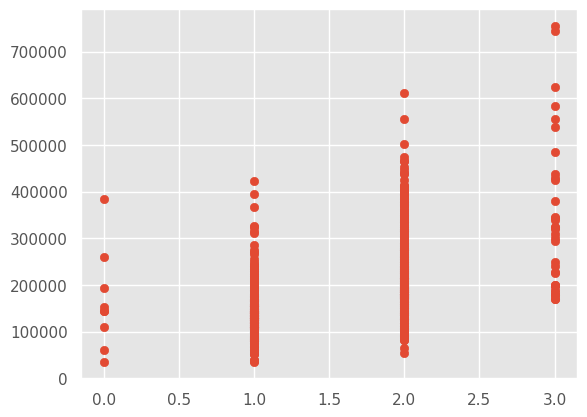

In [51]:
plt.scatter(x='FullBath', y='SalePrice', data=train_df)

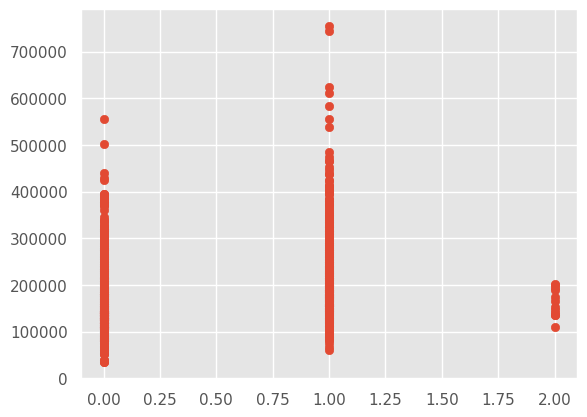

In [52]:
plt.scatter(x='HalfBath', y='SalePrice', data=train_df)

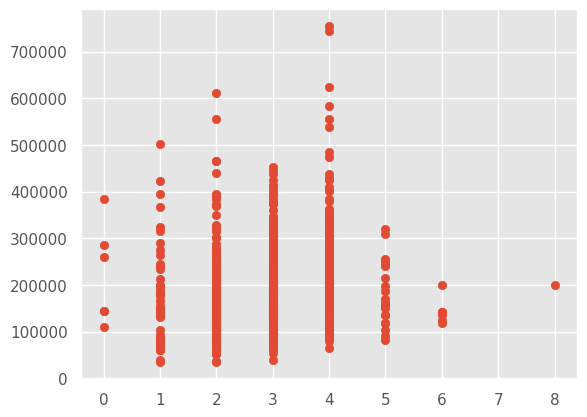

In [53]:
plt.scatter(x='BedroomAbvGr', y='SalePrice', data=train_df)

In [54]:
train_df.query('BedroomAbvGr == 8')
#636

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
635  636         190       RH         60.0    10896   Pave  Pave      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
635         Bnk    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
635      3   2007        WD        Abnorml     200000  

[1 rows x 81 columns]

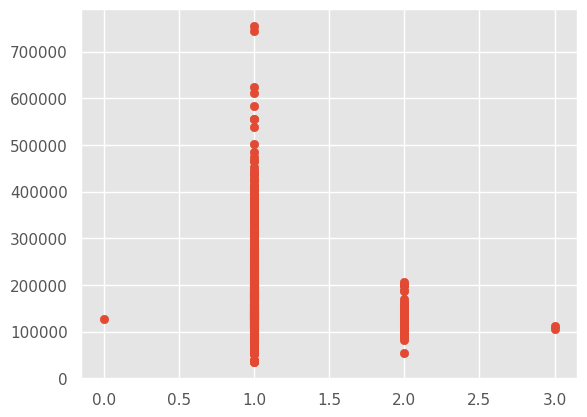

In [55]:
plt.scatter(x='KitchenAbvGr', y='SalePrice', data=train_df)

In [56]:
train_df.query('KitchenAbvGr == 3')
#49, 810

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
48    49         190       RM         33.0     4456   Pave   NaN      Reg   
809  810          75       RM         90.0     8100   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
48          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
809         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
48       6   2009       New        Partial     113000  
809     11   2009        WD         Normal     106000  

[2 rows x 81 columns]

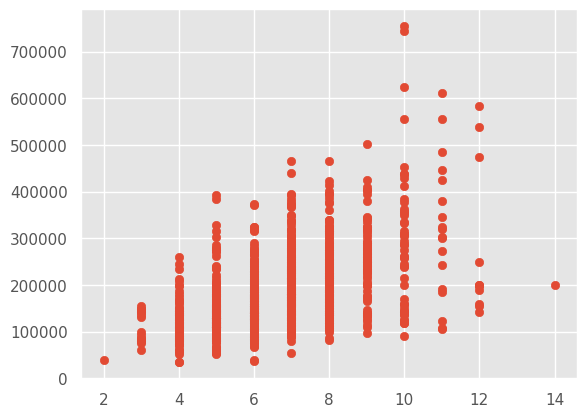

In [57]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=train_df)

In [58]:
train_df.query('TotRmsAbvGrd == 14')
#636

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
635  636         190       RH         60.0    10896   Pave  Pave      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
635         Bnk    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
635      3   2007        WD        Abnorml     200000  

[1 rows x 81 columns]

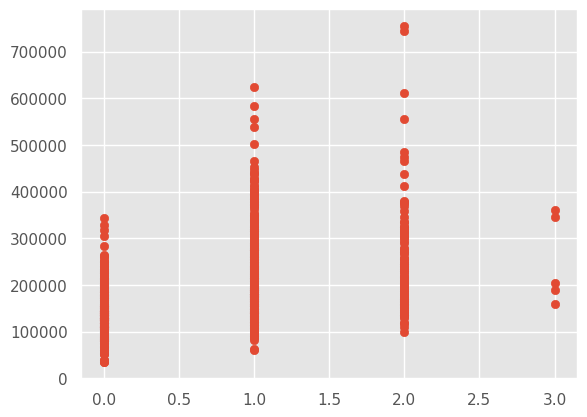

In [59]:
plt.scatter(x='Fireplaces', y='SalePrice', data=train_df)


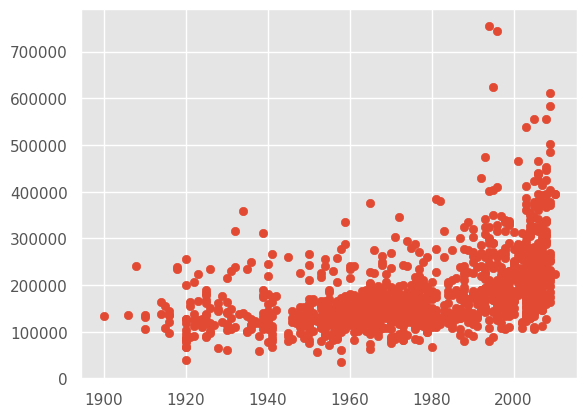

In [60]:
plt.scatter(x='GarageYrBlt', y='SalePrice', data=train_df)

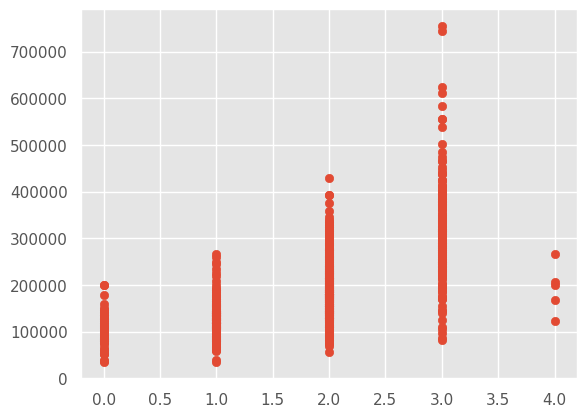

In [61]:
plt.scatter(x='GarageCars', y='SalePrice', data=train_df)

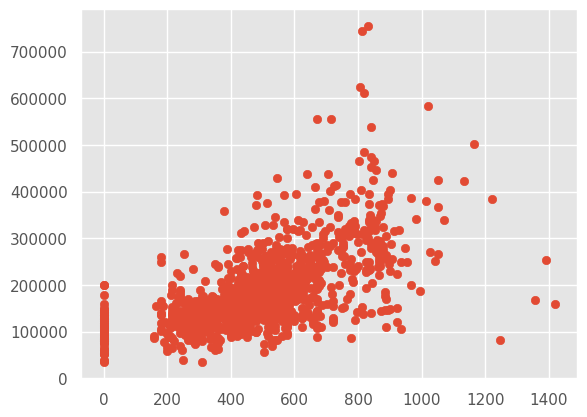

In [62]:
plt.scatter(x='GarageArea', y='SalePrice', data=train_df)

In [63]:
train_df.query('GarageArea > 1200')
#1062, 1191

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
581    582          20       RL         98.0    12704   Pave   NaN      Reg   
825    826          20       RL        114.0    14803   Pave   NaN      Reg   
1061  1062          30  C (all)        120.0    18000   Grvl   NaN      Reg   
1190  1191         190       RL          NaN    32463   Pave   NaN      Reg   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
581          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
825          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
1061         Low    AllPub  ...        0    NaN   NaN        Shed     560   
1190         Low    AllPub  ...        0    NaN   NaN         NaN       0   
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
581       8   2009       New        Partial     253293  
825       6   2008       New        Partial     385000  
1061      8   2008     ConLD         Normal      81000  
1190      3   2007        WD         Normal     168000  
1298      1   2008       New        Partial     160000  

[5 rows x 81 columns]

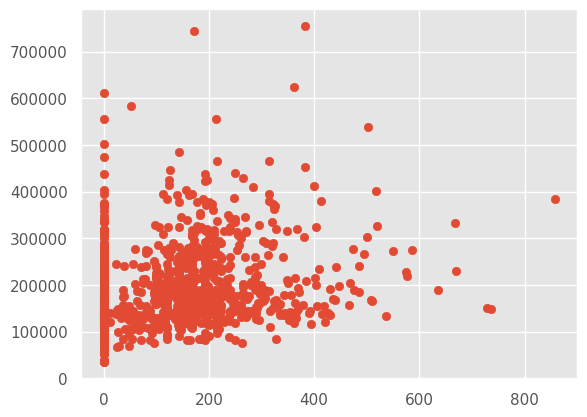

In [64]:
plt.scatter(x='WoodDeckSF', y='SalePrice', data=train_df)

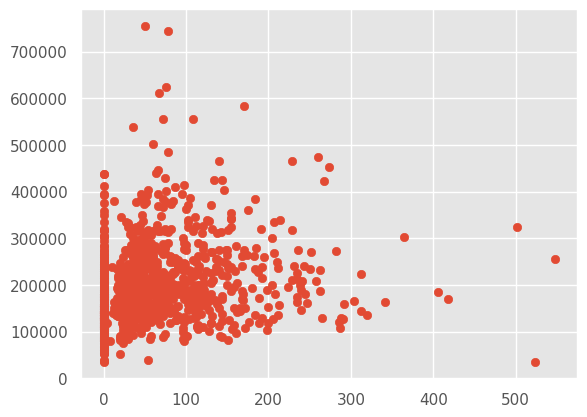

In [65]:
plt.scatter(x='OpenPorchSF', y='SalePrice', data=train_df)

In [66]:
train_df.query('OpenPorchSF > 500')
#496

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
495    496          30  C (all)         60.0     7879   Pave   NaN      Reg   
583    584          75       RM         75.0    13500   Pave   NaN      Reg   
1328  1329          50       RM         60.0    10440   Pave  Grvl      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
495          Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   
583          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1328         Lvl    AllPub  ...        0    NaN  MnPrv        Shed    1150   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
495      11   2009        WD        Abnorml      34900  
583       7   2008        WD         Normal     325000  
1328      6   2008        WD         Normal     256000  

[3 rows x 81 columns]

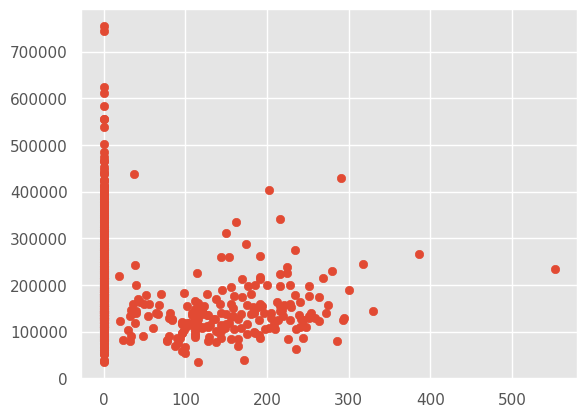

In [67]:
plt.scatter(x='EnclosedPorch', y='SalePrice', data=train_df)

In [68]:
train_df.query('EnclosedPorch > 500')
#198

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
197  198          75       RL        174.0    25419   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
197         Lvl    AllPub  ...      512     Ex  GdPrv         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
197      3   2006        WD        Abnorml     235000  

[1 rows x 81 columns]

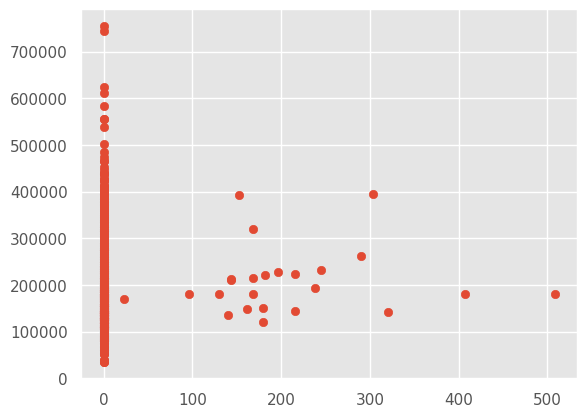

In [69]:
plt.scatter(x='3SsnPorch', y='SalePrice', data=train_df)

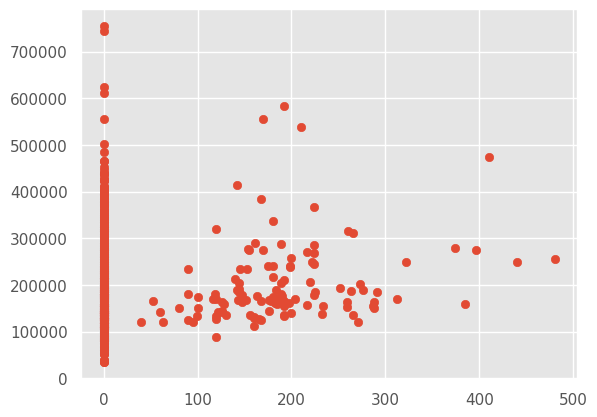

In [70]:
plt.scatter(x='ScreenPorch', y='SalePrice', data=train_df)

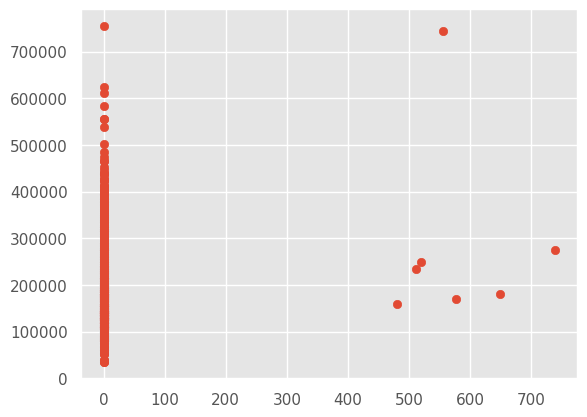

In [71]:
plt.scatter(x='PoolArea', y='SalePrice', data=train_df)

In [72]:
values = [598, 955, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186, 441, 186, 524, 739, 598, 955, 636, 1062, 1191, 496, 198, 1338]

In [73]:
train_df = train_df[train_df.Id.isin(values) == False]

In [74]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)

0
PoolQC        1435
MiscFeature   1388
Alley         1350
Fence         1162
MasVnrType     861
FireplaceQu    684
LotFrontage    255
GarageYrBlt     76
GarageCond      76
GarageType      76
GarageFinish    76
GarageQual      76
BsmtFinType2    38
BsmtExposure    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrArea       8
Electrical       1
Id               0

In [75]:
train_df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [76]:
train_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [77]:
train_df['Alley'].fillna('No', inplace=True)
test_df['Alley'].fillna('No', inplace=True)

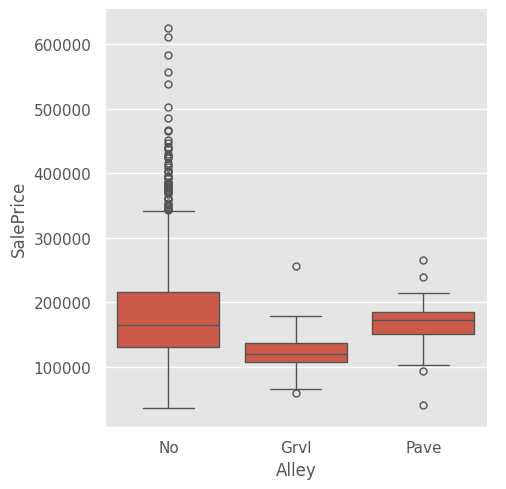

In [78]:
sns.catplot(data=train_df, x="Alley", y="SalePrice", kind="box")

In [79]:
train_df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [80]:
train_df['Fence'].fillna('No', inplace=True)
test_df['Fence'].fillna('No', inplace=True)

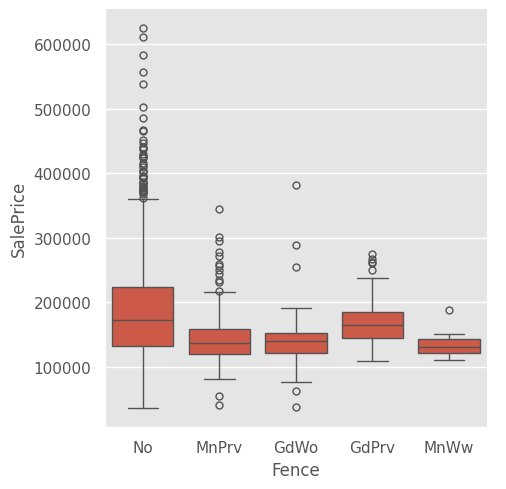

In [81]:
sns.catplot(data=train_df, x="Fence", y="SalePrice", kind="box")

In [82]:
train_df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [83]:
train_df['MasVnrType'].fillna('No', inplace=True)
test_df['MasVnrType'].fillna('No', inplace=True)

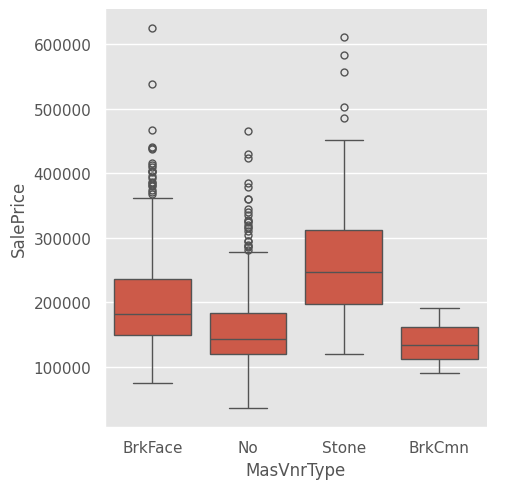

In [84]:
sns.catplot(data=train_df, x="MasVnrType", y="SalePrice", kind="box")

In [85]:
train_df['MasVnrArea'].fillna(0, inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)

In [86]:
train_df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [87]:
train_df['FireplaceQu'].fillna('No', inplace=True)
test_df['FireplaceQu'].fillna('No', inplace=True)

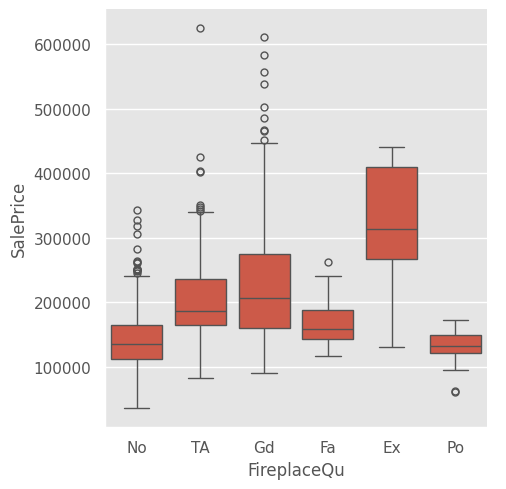

In [88]:
sns.catplot(data=train_df, x="FireplaceQu", y="SalePrice", kind="box")

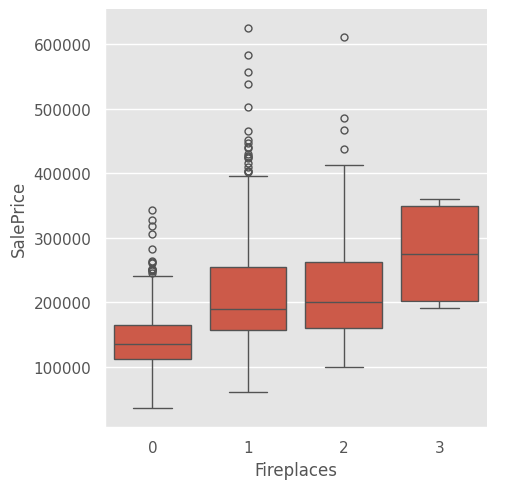

In [89]:
sns.catplot(data=train_df, x="Fireplaces", y="SalePrice", kind="box")

In [90]:
train_df['LotFrontage'].fillna(0, inplace=True)
test_df['LotFrontage'].fillna(0, inplace=True)

In [91]:
train_df['GarageYrBlt'].corr(train_df['YearBuilt'])

0.8289827595060575

In [92]:
train_df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [93]:
train_df['GarageCond'].fillna('No', inplace=True)
test_df['GarageCond'].fillna('No', inplace=True)

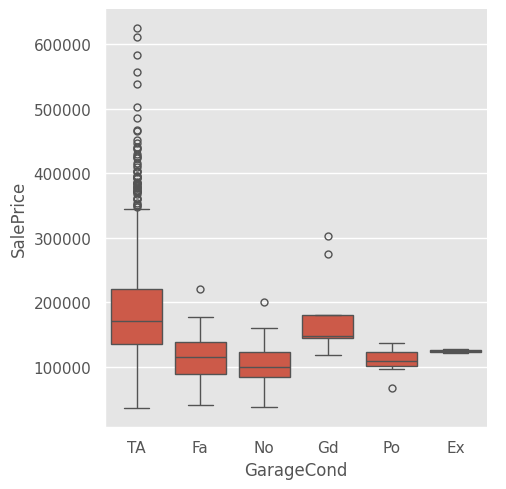

In [94]:
sns.catplot(data=train_df, x="GarageCond", y="SalePrice", kind="box")

In [95]:
train_df['GarageType'].fillna('No', inplace=True)
test_df['GarageType'].fillna('No', inplace=True)

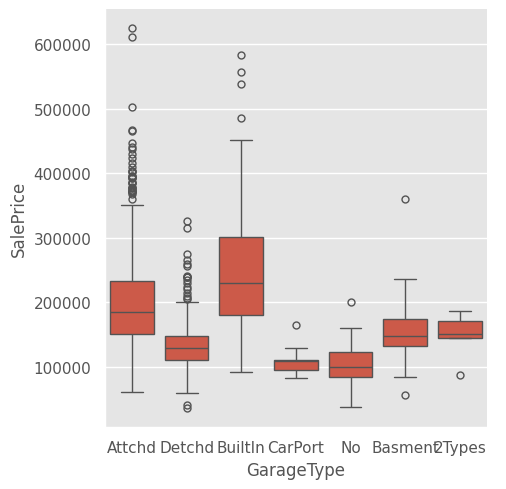

In [96]:
sns.catplot(data=train_df, x="GarageType", y="SalePrice", kind="box")

In [97]:
train_df['GarageFinish'].fillna('No', inplace=True)
test_df['GarageFinish'].fillna('No', inplace=True)

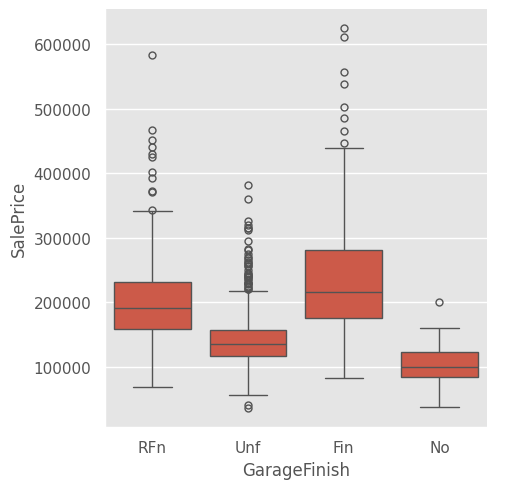

In [98]:
sns.catplot(data=train_df, x="GarageFinish", y="SalePrice", kind="box")

In [99]:
train_df['GarageQual'].fillna('No', inplace=True)
test_df['GarageQual'].fillna('No', inplace=True)

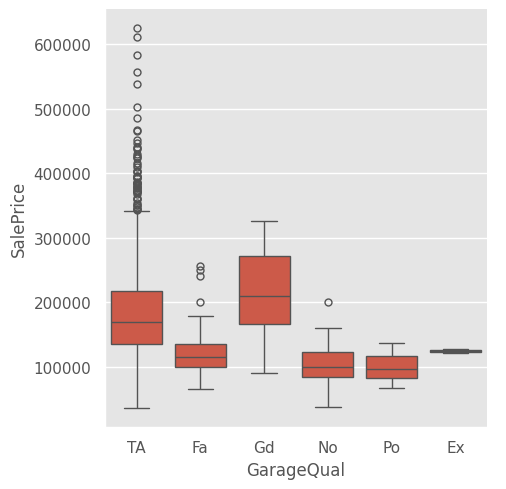

In [100]:
sns.catplot(data=train_df, x="GarageQual", y="SalePrice", kind="box")

In [101]:
train_df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [102]:
train_df['BsmtFinType2'].fillna('Unf', inplace=True)
test_df['BsmtFinType2'].fillna('Unf', inplace=True)

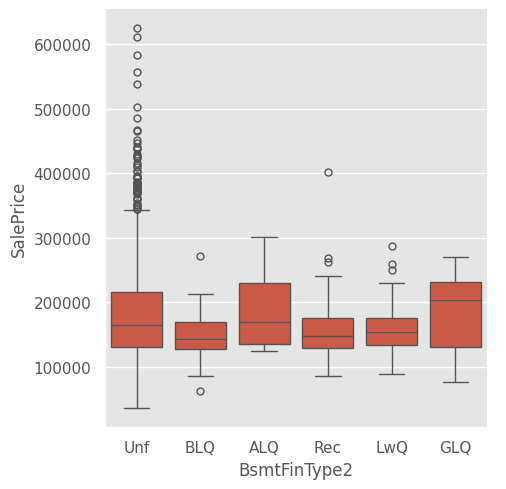

In [103]:
sns.catplot(data=train_df, x="BsmtFinType2", y="SalePrice", kind="box")

In [104]:
train_df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [105]:
train_df['BsmtExposure'].fillna('No', inplace=True)
test_df['BsmtExposure'].fillna('No', inplace=True)

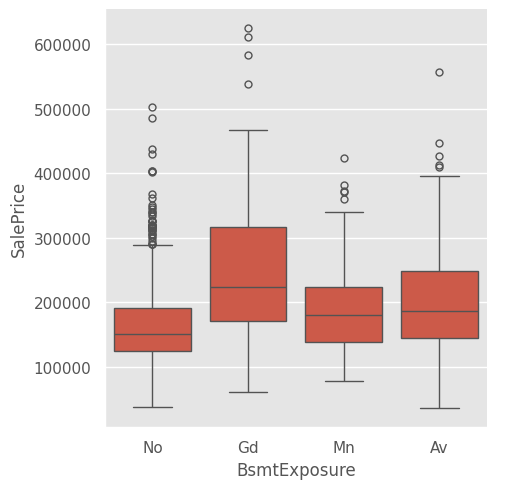

In [106]:
sns.catplot(data=train_df, x="BsmtExposure", y="SalePrice", kind="box")

In [107]:
train_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [108]:
train_df['BsmtQual'].fillna('No', inplace=True)
test_df['BsmtQual'].fillna('No', inplace=True)

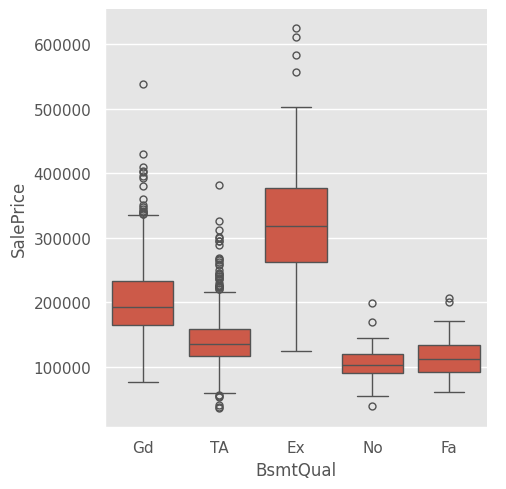

In [109]:
sns.catplot(data=train_df, x="BsmtQual", y="SalePrice", kind="box")

In [110]:
train_df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [111]:
train_df['BsmtCond'].fillna('No', inplace=True)
test_df['BsmtCond'].fillna('No', inplace=True)

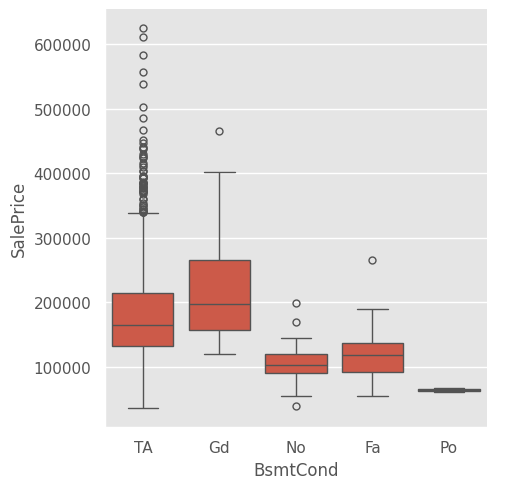

In [112]:
sns.catplot(data=train_df, x="BsmtCond", y="SalePrice", kind="box")

In [113]:
train_df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [114]:
train_df['BsmtFinType1'].fillna('Unf', inplace=True)
test_df['BsmtFinType1'].fillna('Unf', inplace=True)

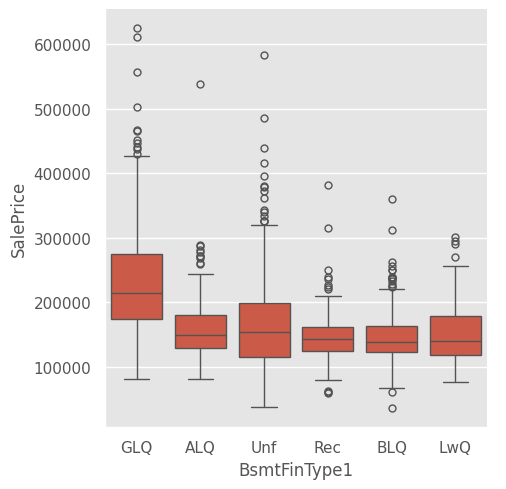

In [115]:
sns.catplot(data=train_df, x="BsmtFinType1", y="SalePrice", kind="box")

In [116]:
train_df['MasVnrArea'].fillna(0, inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)

In [117]:
train_df['Electrical'].fillna('SBrkr', inplace=True)
test_df['Electrical'].fillna('SBrkr', inplace=True)

In [118]:
train_df = train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])
test_df = test_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])

In [119]:
train_df['houseage'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['houseage'] = test_df['YrSold'] - test_df['YearBuilt']

In [120]:
train_df['houseremodelage'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['houseremodelage'] = test_df['YrSold'] - test_df['YearRemodAdd']

In [121]:
train_df['totalsf'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']
test_df['totalsf'] = test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']

In [122]:
train_df['totalarea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
test_df['totalarea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']

In [123]:
train_df['totalbaths'] = train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5 * (train_df['BsmtHalfBath'] + train_df['HalfBath'])
test_df['totalbaths'] = test_df['BsmtFullBath'] + test_df['FullBath'] + 0.5 * (test_df['BsmtHalfBath'] + test_df['HalfBath'])

In [124]:
train_df['totalporchsf'] = train_df['OpenPorchSF'] + train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF']
test_df['totalporchsf'] = test_df['OpenPorchSF'] + test_df['3SsnPorch'] + test_df['EnclosedPorch'] + test_df['ScreenPorch'] + test_df['WoodDeckSF']

In [125]:
train_df = train_df.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])
test_df = test_df.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

                 MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass         1.000000    -0.217033 -0.299842     0.038963    -0.064205   
LotFrontage       -0.217033     1.000000  0.129455     0.152756    -0.050943   
LotArea           -0.299842     0.129455  1.000000     0.151382    -0.017413   
OverallQual        0.038963     0.152756  0.151382     1.000000    -0.097649   
OverallCond       -0.064205    -0.050943 -0.017413    -0.097649     1.000000   
MasVnrArea         0.026992     0.093907  0.118903     0.398440    -0.127154   
BsmtUnfSF         -0.143462     0.176552  0.045211     0.312675    -0.145640   
LowQualFinSF       0.020908     0.030311 -0.017858    -0.068377    -0.001404   
BedroomAbvGr      -0.042937     0.146341  0.195736     0.098716    -0.004323   
KitchenAbvGr       0.283269     0.039101 -0.013061    -0.188977    -0.096092   
TotRmsAbvGrd       0.030881     0.197015  0.288258     0.410932    -0.069967   
Fireplaces        -0.048391     0.017969

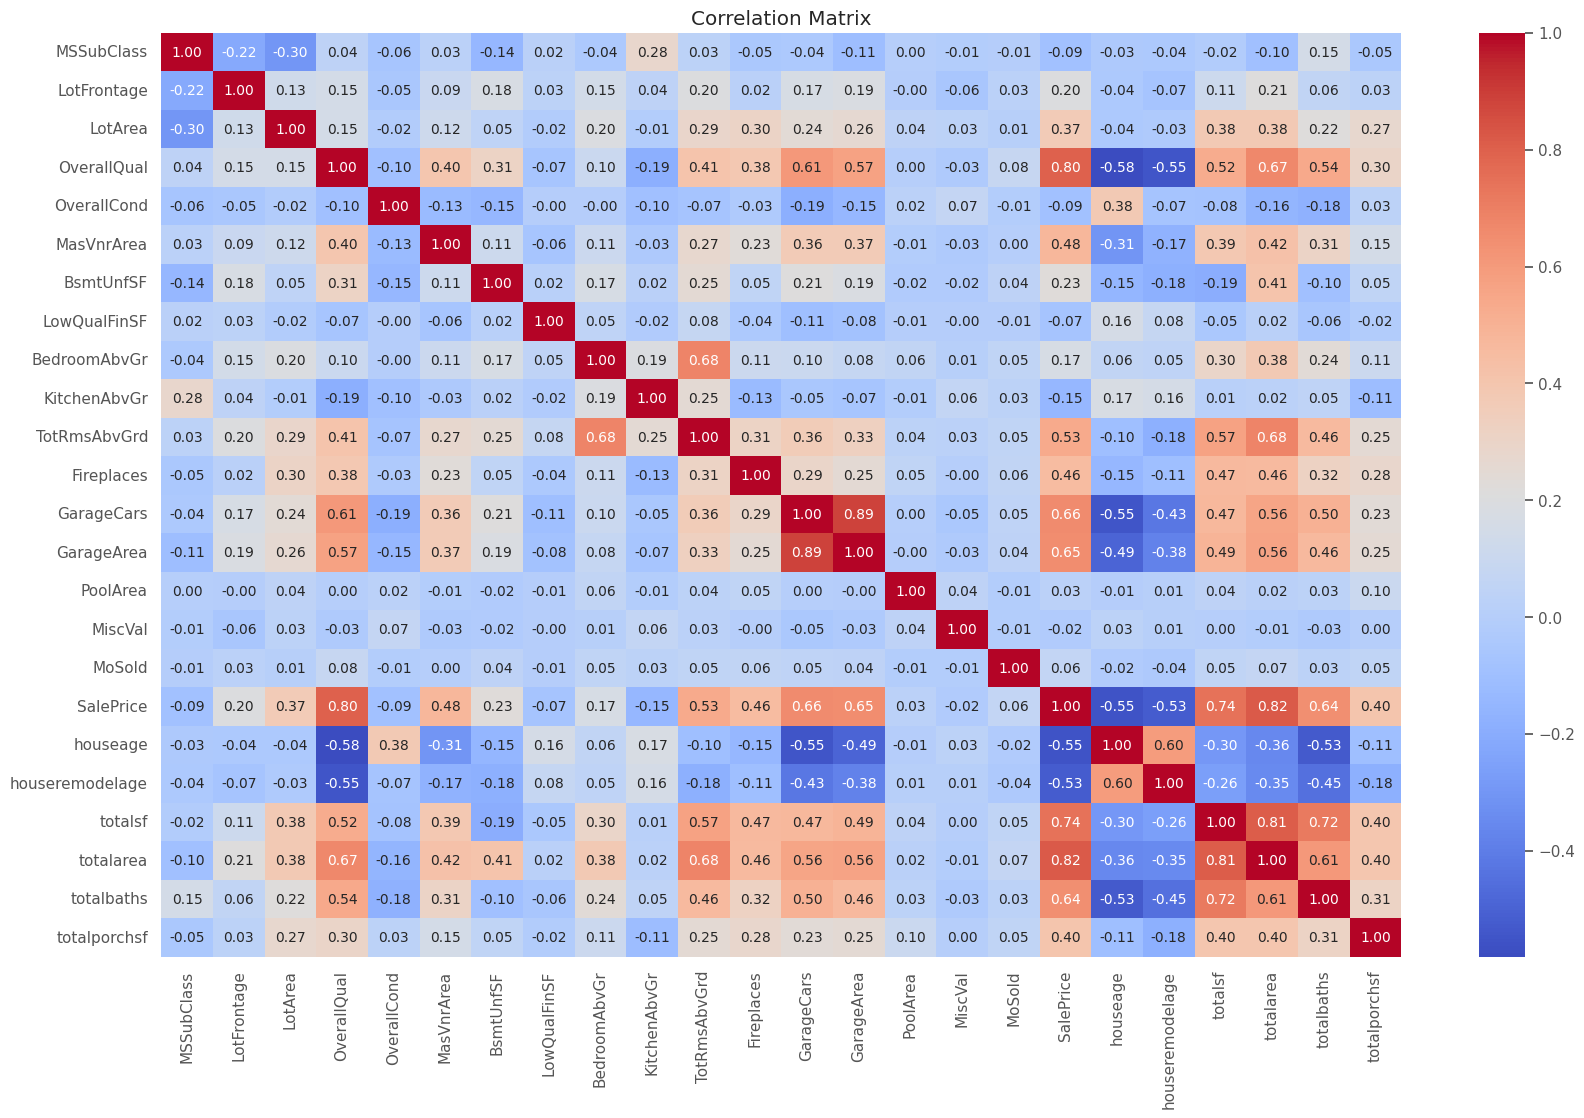

In [126]:
corr_matrix = train_df.corr(numeric_only=True)

# Print the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [127]:
train_df = train_df.drop(columns=['GarageArea'])
test_df = test_df.drop(columns=['GarageArea'])

<Axes: xlabel='SalePrice', ylabel='Count'>

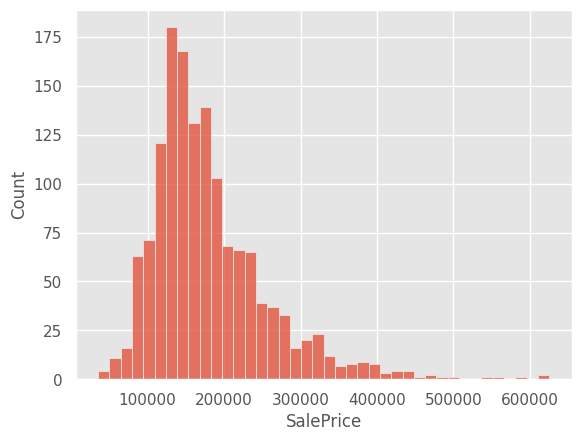

In [128]:
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

In [129]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

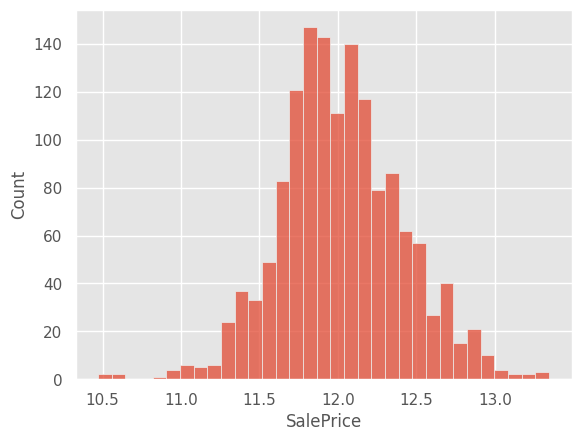

In [130]:
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

In [131]:
train_df.dtypes[train_df.dtypes=='object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [132]:
train_df.dtypes[train_df.dtypes !='object']

MSSubClass           int64
LotFrontage        float64
LotArea              int64
OverallQual          int64
OverallCond          int64
MasVnrArea         float64
BsmtUnfSF            int64
LowQualFinSF         int64
BedroomAbvGr         int64
KitchenAbvGr         int64
TotRmsAbvGrd         int64
Fireplaces           int64
GarageCars           int64
PoolArea             int64
MiscVal              int64
MoSold               int64
SalePrice          float64
houseage             int64
houseremodelage      int64
totalsf              int64
totalarea            int64
totalbaths         float64
totalporchsf         int64
dtype: object

In [133]:
ode_cols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional', \
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']

In [134]:
ohe_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', \
           'MasVnrType','Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [135]:
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')

In [136]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [137]:
ode_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [138]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [139]:
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe_p', ohe_pipeline, ohe_cols),
    ],
    remainder='passthrough',
    n_jobs=-1)

In [140]:
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

In [141]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [142]:
X_preprocessed = pipeline.fit_transform(X)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

In [144]:
print(X.shape, X_train.shape, X_test.shape)

(1439, 59) (1151, 194) (288, 194)


Mean Absolute Error:  18171211.061650917
Mean Squared Error:  2.6184861387873704e+16
Root Mean Squared Error:  161817370.4763296
R² on Test data:  -1.656971581971186e+17


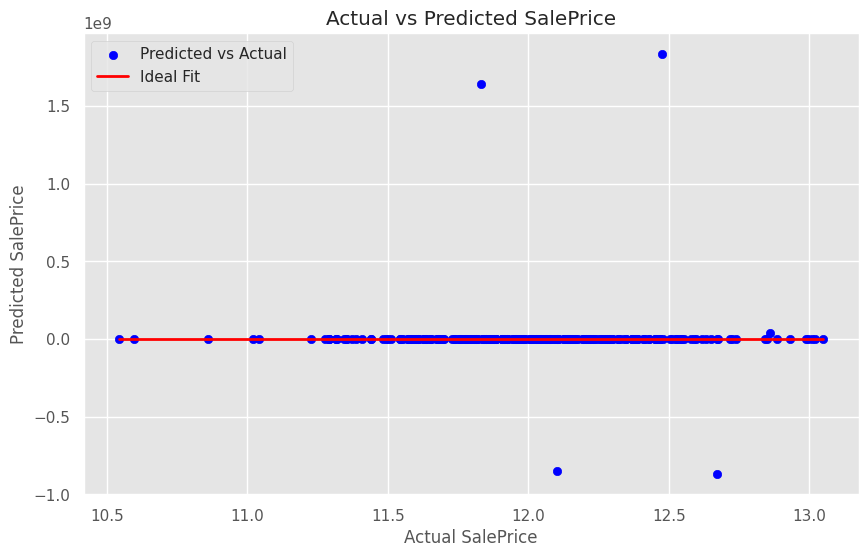

In [145]:
lr = LinearRegression()
lr.fit(X_train, y_train)

X_test_prediction = lr.predict(X_test)

# mean absolute error for test data
mae = mean_absolute_error(y_test, X_test_prediction)
print('Mean Absolute Error: ', mae)

#mean Square error for test data
mse=mean_squared_error(y_test, X_test_prediction)
print('Mean Squared Error: ', mse)

#root mean square error for test data
rmse=np.sqrt(mse)
print('Root Mean Squared Error: ', rmse)

# R² score on test data
test_data_r2 = r2_score(y_test, X_test_prediction)
print('R² on Test data: ', test_data_r2)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, X_test_prediction, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()


Best parameters for KNN:  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best score for KNN:  -0.02380061902588408
Best RMSE for KNN:  0.15427449246678493

Training Data Metrics for KNN:
Mean Absolute Error:  0.0
Mean Squared Error:  0.0
Root Mean Squared Error:  0.0
R2 Score:  1.0

Test Data Metrics for KNN:
Mean Absolute Error:  0.10235216116792424
Mean Squared Error:  0.02329814736365228
Root Mean Squared Error:  0.15263730659197403
R2 Score:  0.8525698970779103


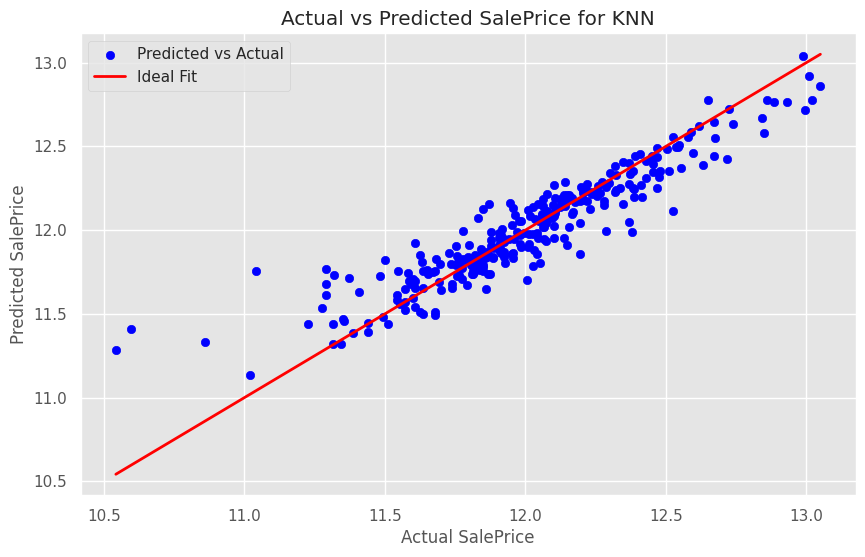

In [159]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
# Define the KNN model
knn = KNeighborsRegressor()

# Define the parameter grid for GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
knn_cv = GridSearchCV(knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
knn_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for KNN: ", knn_cv.best_params_)
print("Best score for KNN: ", knn_cv.best_score_)
print("Best RMSE for KNN: ", np.sqrt(-1 * knn_cv.best_score_))

# Get the best estimator
best_knn = knn_cv.best_estimator_

# Predict on training data
y_train_pred = best_knn.predict(X_train)

# Predict on test data
y_test_pred = best_knn.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for KNN:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for KNN:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for KNN')
plt.legend()
plt.show()


Best parameters for SVM:  {'C': 6.199966577826209, 'degree': 5, 'gamma': 0.001, 'kernel': 'rbf'}
Best score for SVM:  -0.011653303428674147
Best RMSE for SVM:  0.10795046747779348

Training Data Metrics for SVM:
Mean Absolute Error:  0.06724970743145231
Mean Squared Error:  0.008336605864424841
Root Mean Squared Error:  0.09130501554911888
R2 Score:  0.9446379997576401

Test Data Metrics for SVM:
Mean Absolute Error:  0.07985810287687183
Mean Squared Error:  0.015304841689223877
Root Mean Squared Error:  0.12371273858913591
R2 Score:  0.9031513385923211


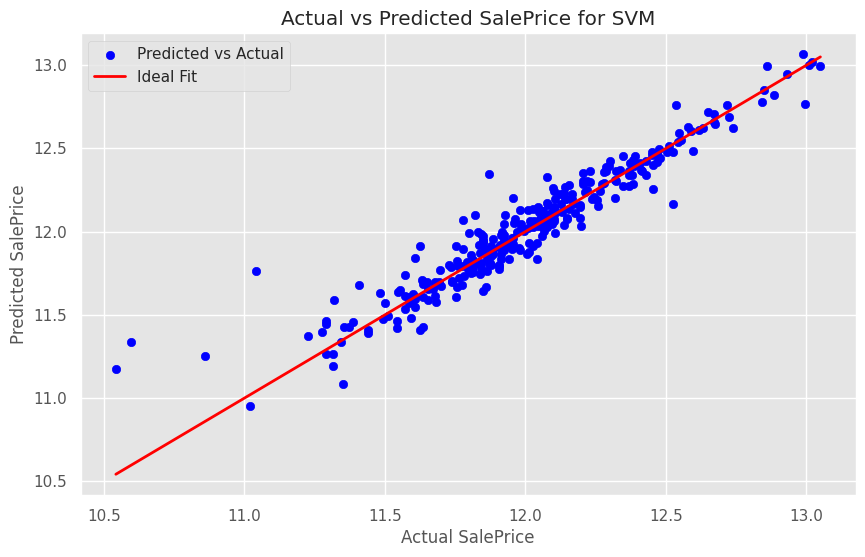

In [165]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import matplotlib.pyplot as plt

# Define the SVM model
svm = SVR()

# Define the parameter distributions for RandomizedSearchCV
param_dist_svm = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 10)),
    'degree': [3, 4, 5]
}

# Initialize RandomizedSearchCV
svm_random_search = RandomizedSearchCV(svm, param_distributions=param_dist_svm, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
svm_random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for SVM: ", svm_random_search.best_params_)
print("Best score for SVM: ", svm_random_search.best_score_)
print("Best RMSE for SVM: ", np.sqrt(-1 * svm_random_search.best_score_))

# Get the best estimator
best_svm = svm_random_search.best_estimator_

# Predict on training data
y_train_pred = best_svm.predict(X_train)

# Predict on test data
y_test_pred = best_svm.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for SVM:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for SVM:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for SVM')
plt.legend()
plt.show()


Best parameters for Decision Tree:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 2}
Best score for Decision Tree:  -0.030557119487666772
Best RMSE for Decision Tree:  0.17480594809006578

Training Data Metrics for Decision Tree:
Mean Absolute Error:  0.08467406870440759
Mean Squared Error:  0.013903695719426184
Root Mean Squared Error:  0.11791393352537342
R2 Score:  0.9076678904692734

Test Data Metrics for Decision Tree:
Mean Absolute Error:  0.12993625968889358
Mean Squared Error:  0.033389736450998304
Root Mean Squared Error:  0.1827285868467173
R2 Score:  0.7887105697858182


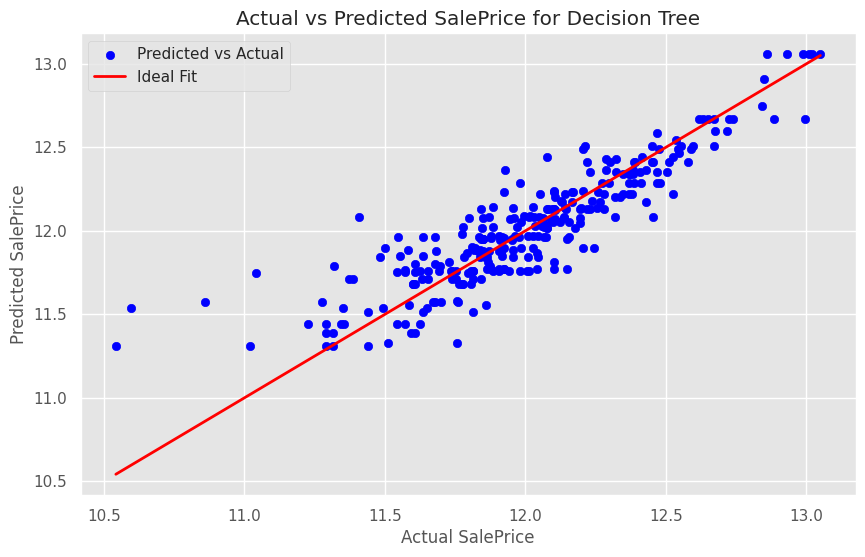

In [161]:
from sklearn.tree import DecisionTreeRegressor


# Define the Decision Tree model
dt = DecisionTreeRegressor(random_state=13)

# Define the parameter grid for GridSearchCV
param_grid_dt = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}
dt_cv = GridSearchCV(dt, param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
dt_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Decision Tree: ", dt_cv.best_params_)
print("Best score for Decision Tree: ", dt_cv.best_score_)
print("Best RMSE for Decision Tree: ", np.sqrt(-1 * dt_cv.best_score_))

# Get the best estimator
best_dt = dt_cv.best_estimator_

# Predict on training data
y_train_pred = best_dt.predict(X_train)

# Predict on test data
y_test_pred = best_dt.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for Decision Tree:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for Decision Tree:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for Decision Tree')
plt.legend()
plt.show()


Best parameters for ElasticNet:  {'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 1000}
Best score for ElasticNet:  -0.012356260756669285
Best RMSE for ElasticNet:  0.11115871876136971

Training Data Metrics for ElasticNet:
Mean Absolute Error:  0.07439969315563129
Mean Squared Error:  0.01065763647777888
Root Mean Squared Error:  0.10323582942844446
R2 Score:  0.9292244250404554

Test Data Metrics for ElasticNet:
Mean Absolute Error:  0.07976902475792423
Mean Squared Error:  0.015144792846742139
Root Mean Squared Error:  0.12306418181884662
R2 Score:  0.9041641237271794


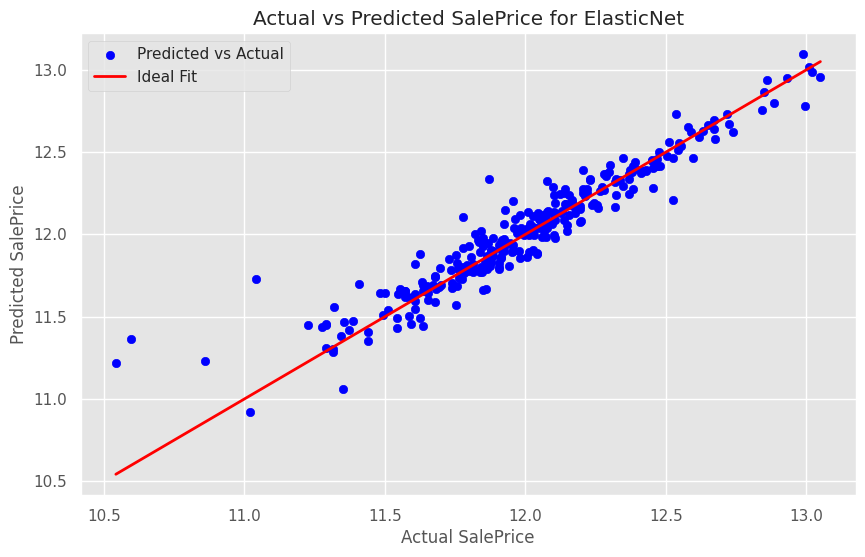

In [162]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define the ElasticNet model
elasticnet = ElasticNet(random_state=13)

# Define the parameter grid for GridSearchCV
param_grid_en = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9],
    'max_iter': [1000, 2000, 3000]
}
en_cv = GridSearchCV(elasticnet, param_grid_en, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
en_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for ElasticNet: ", en_cv.best_params_)
print("Best score for ElasticNet: ", en_cv.best_score_)
print("Best RMSE for ElasticNet: ", np.sqrt(-1 * en_cv.best_score_))

# Get the best estimator
best_en = en_cv.best_estimator_

# Predict on training data
y_train_pred = best_en.predict(X_train)

# Predict on test data
y_test_pred = best_en.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for ElasticNet:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for ElasticNet:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for ElasticNet')
plt.legend()
plt.show()


Best parameters for Bayesian Ridge:  {'alpha_1': 0.0001, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 0.0001, 'n_iter': 100}
Best score for Bayesian Ridge:  -0.011929152332241524
Best RMSE for Bayesian Ridge:  0.10922065890774292

Training Data Metrics for Bayesian Ridge:
Mean Absolute Error:  0.06969160159740229
Mean Squared Error:  0.009226565486694857
Root Mean Squared Error:  0.09605501281398518
R2 Score:  0.9387279272862935

Test Data Metrics for Bayesian Ridge:
Mean Absolute Error:  0.07885300559229266
Mean Squared Error:  0.015075952538585787
Root Mean Squared Error:  0.12278417055380464
R2 Score:  0.90459974350236


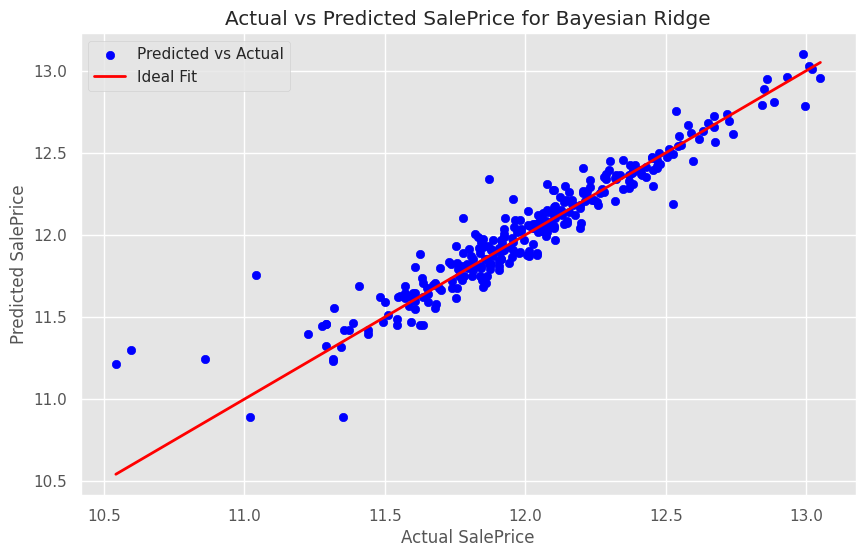

In [163]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define the Bayesian Ridge model
bayesian_ridge = BayesianRidge()

# Define the parameter grid for GridSearchCV
param_grid_br = {
    'alpha_1': [1e-6, 1e-5, 1e-4],
    'alpha_2': [1e-6, 1e-5, 1e-4],
    'lambda_1': [1e-6, 1e-5, 1e-4],
    'lambda_2': [1e-6, 1e-5, 1e-4],
    'n_iter': [100, 200, 300]
}
br_cv = GridSearchCV(bayesian_ridge, param_grid_br, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
br_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Bayesian Ridge: ", br_cv.best_params_)
print("Best score for Bayesian Ridge: ", br_cv.best_score_)
print("Best RMSE for Bayesian Ridge: ", np.sqrt(-1 * br_cv.best_score_))

# Get the best estimator
best_br = br_cv.best_estimator_

# Predict on training data
y_train_pred = best_br.predict(X_train)

# Predict on test data
y_test_pred = best_br.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for Bayesian Ridge:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for Bayesian Ridge:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for Bayesian Ridge')
plt.legend()
plt.show()


Best parameters for AdaBoost:  {'learning_rate': 1, 'n_estimators': 200}
Best score for AdaBoost:  -0.023292203640441003
Best RMSE for AdaBoost:  0.1526178352632516

Training Data Metrics for AdaBoost:
Mean Absolute Error:  0.10554092714460565
Mean Squared Error:  0.016582349290246996
Root Mean Squared Error:  0.12877247101087638
R2 Score:  0.8898794017187367

Test Data Metrics for AdaBoost:
Mean Absolute Error:  0.11619693597923224
Mean Squared Error:  0.025139230074202847
Root Mean Squared Error:  0.15855355585480524
R2 Score:  0.8409195710125849


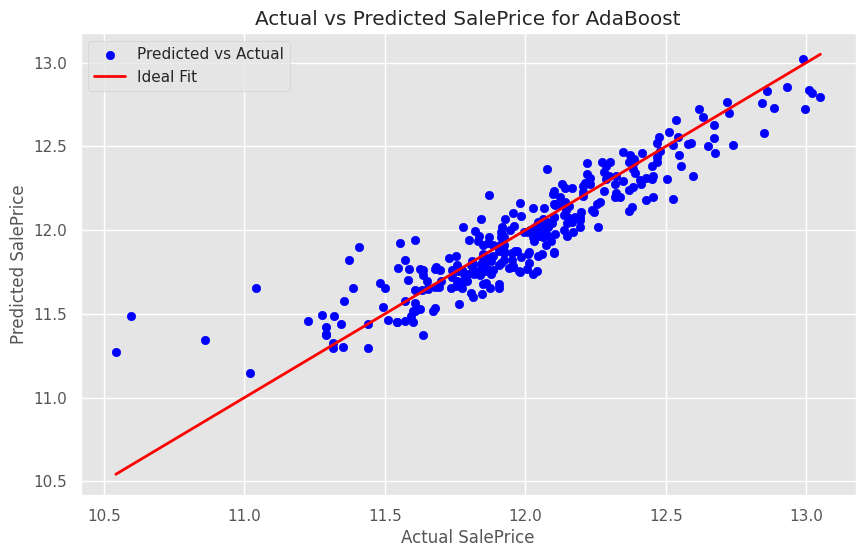

In [164]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define the AdaBoost Regressor model
ada = AdaBoostRegressor(random_state=13)

# Define the parameter grid for GridSearchCV
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}
ada_cv = GridSearchCV(ada, param_grid_ada, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ada_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for AdaBoost: ", ada_cv.best_params_)
print("Best score for AdaBoost: ", ada_cv.best_score_)
print("Best RMSE for AdaBoost: ", np.sqrt(-1 * ada_cv.best_score_))

# Get the best estimator
best_ada = ada_cv.best_estimator_

# Predict on training data
y_train_pred = best_ada.predict(X_train)

# Predict on test data
y_test_pred = best_ada.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for AdaBoost:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for AdaBoost:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for AdaBoost')
plt.legend()
plt.show()


Best parameters:  {'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 500}
Best score:  -0.01793669252835381
Best RMSE:  0.13392793781864115

Training Data Metrics:
Mean Absolute Error:  0.035713132595192355
Mean Squared Error:  0.0026063914232766134
Root Mean Squared Error:  0.051052829728396185
R2 Score:  0.9826913920420682

Test Data Metrics:
Mean Absolute Error:  0.09472957075115869
Mean Squared Error:  0.019671744130738744
Root Mean Squared Error:  0.14025599499037017
R2 Score:  0.8755176874545624


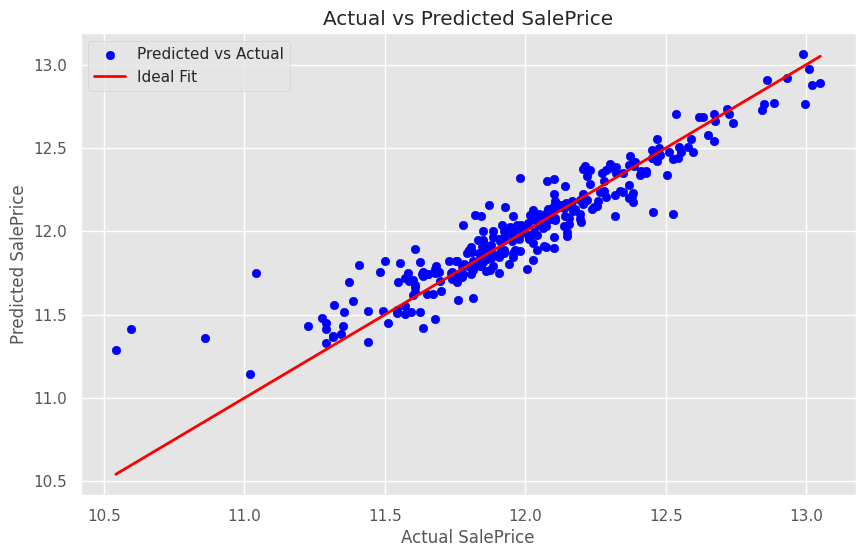

In [146]:
RFR = RandomForestRegressor(random_state=13)

# Define the parameter grid for GridSearchCV for hyper parametr tuning
param_grid_RFR = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [3, 5, 10]
}
rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rfr_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", rfr_cv.best_params_)
print("Best score: ", rfr_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * rfr_cv.best_score_))

# Get the best estimator
best_rfr = rfr_cv.best_estimator_

# Predict on training data
y_train_pred = best_rfr.predict(X_train)

# Predict on test data
y_test_pred = best_rfr.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()



Best parameters:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 300, 'subsample': 0.9}
Best score:  -0.014241280480243007
Best RMSE:  0.11933683622521173

Training Data Metrics:
Mean Absolute Error:  0.051576997368277644
Mean Squared Error:  0.0048783296589063425
Root Mean Squared Error:  0.06984504033148196
R2 Score:  0.9676038315651717

Test Data Metrics:
Mean Absolute Error:  0.08094406414291254
Mean Squared Error:  0.01496304287888076
Root Mean Squared Error:  0.12232351727644508
R2 Score:  0.9053142330491633


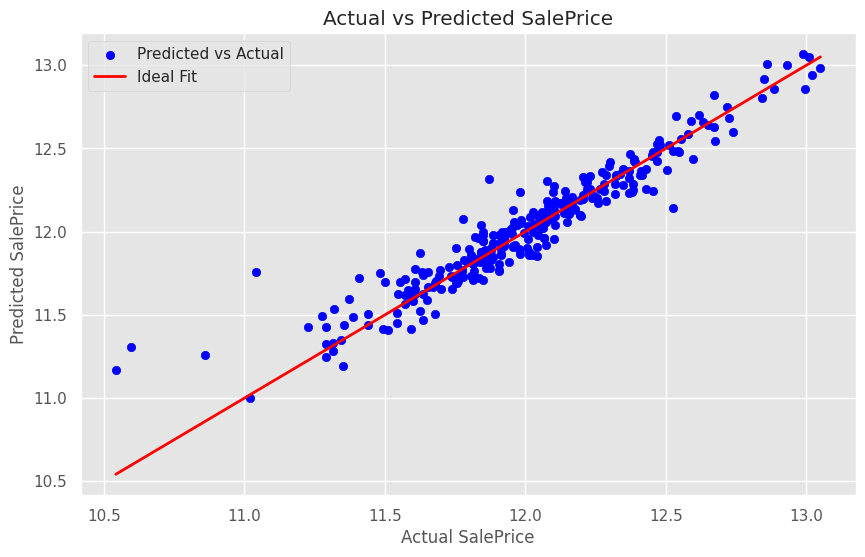

In [147]:
XGB = XGBRegressor(random_state=13)
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}
xgb_cv = GridSearchCV(XGB, param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", xgb_cv.best_params_)
print("Best score: ", xgb_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * xgb_cv.best_score_))

# Get the best estimator
best_xgb = xgb_cv.best_estimator_

# Predict on training data
y_train_pred = best_xgb.predict(X_train)

# Predict on test data
y_test_pred = best_xgb.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()


Best parameters:  {'alpha': 10, 'solver': 'lsqr'}
Best score:  -0.011902170604274353
Best RMSE:  0.10909706964109693

Training Data Metrics:
Mean Absolute Error:  0.06956875957500305
Mean Squared Error:  0.009191708198707703
Root Mean Squared Error:  0.0958733967204026
R2 Score:  0.9389594086850037

Test Data Metrics:
Mean Absolute Error:  0.07886728622831916
Mean Squared Error:  0.015088612243787223
Root Mean Squared Error:  0.12283571241209627
R2 Score:  0.9045196331995244


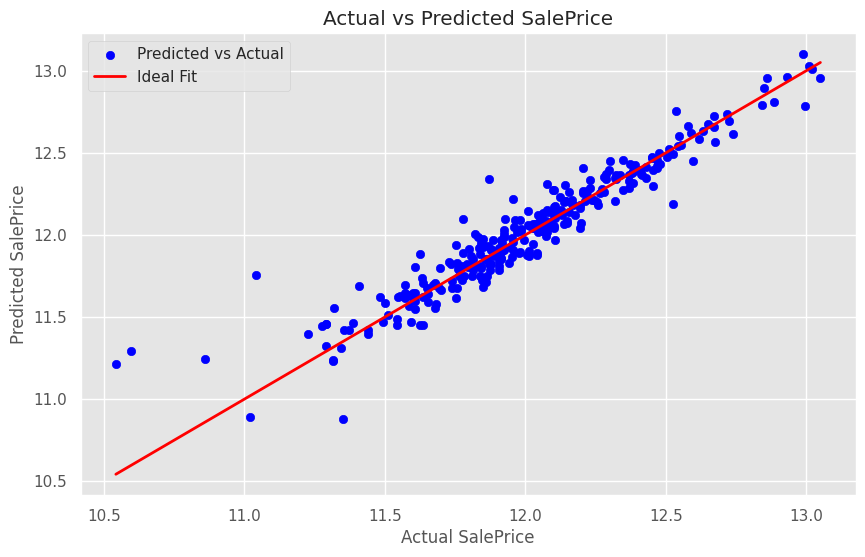

In [148]:
# Initialize the Ridge regressor
ridge = Ridge()

# Define the parameter grid for GridSearchCV
param_grid_ridge = {
    'alpha': [0.05, 0.1, 1, 3, 5, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}

# Perform GridSearchCV
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", ridge_cv.best_params_)
print("Best score: ", ridge_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * ridge_cv.best_score_))
# Get the best estimator
best_ridge = ridge_cv.best_estimator_

# Predict on training data
y_train_pred = best_ridge.predict(X_train)

# Predict on test data
y_test_pred = best_ridge.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()



Best parameters:  {'learning_rate': 0.01, 'max_depth': 12, 'max_features': 0.1, 'min_samples_leaf': 25, 'n_estimators': 1000}
Best score:  -0.012886396884245426
Best RMSE:  0.11351826674260591

Training Data Metrics:
Mean Absolute Error:  0.042384495675012866
Mean Squared Error:  0.0038987260279260564
Root Mean Squared Error:  0.062439779211061086
R2 Score:  0.9741092148515733

Test Data Metrics:
Mean Absolute Error:  0.07521549784090024
Mean Squared Error:  0.014986030682174946
Root Mean Squared Error:  0.12241744435404191
R2 Score:  0.9051687667958721


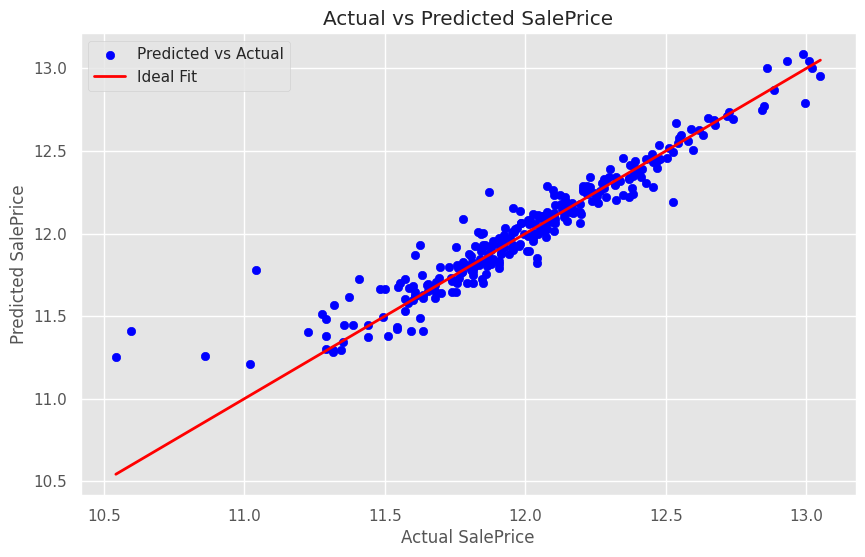

In [150]:
# Initialize the GradientBoostingRegressor
GBR = GradientBoostingRegressor()

# Define the parameter grid for GridSearchCV
param_grid_GBR = {
    'max_depth': [12, 15, 20],
    'n_estimators': [200, 300, 1000],
    'min_samples_leaf': [10, 25, 50],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': [0.01, 0.1, 0.7]
}

# Perform GridSearchCV
GBR_cv = GridSearchCV(GBR, param_grid_GBR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
GBR_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", GBR_cv.best_params_)
print("Best score: ", GBR_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * GBR_cv.best_score_))

# Get the best estimator
best_gbr = GBR_cv.best_estimator_

# Predict on training data
y_train_pred = best_gbr.predict(X_train)

# Predict on test data
y_test_pred = best_gbr.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1994
[LightGBM] [Info] Number of data points in the train set: 1151, number of used features: 112
[LightGBM] [Info] Start training from score 12.023259
Best parameters:  {'boosting_type': 'gbdt', 'learning_rate': 0.05, 'n_estimators': 200, 'num_leaves': 20}
Best score:  -0.016202694958546423
Best RMSE:  0.12728980697034

Training Data Metrics:
Mean Absolute Error:  0.036804256669954946
Mean Squared Error:  0.002687607182201562
Root Mean Squared Error:  0.05184213712995985
R2 Score:  0.9821520518191517

Test Data Metrics:
Mean Absolute Error:  0.08363685396432347
Mean Squared Error:  0.01637112581878319
Root Mean Squared Error:  0.12794970034659398
R2 Score:  0.8964039188721431


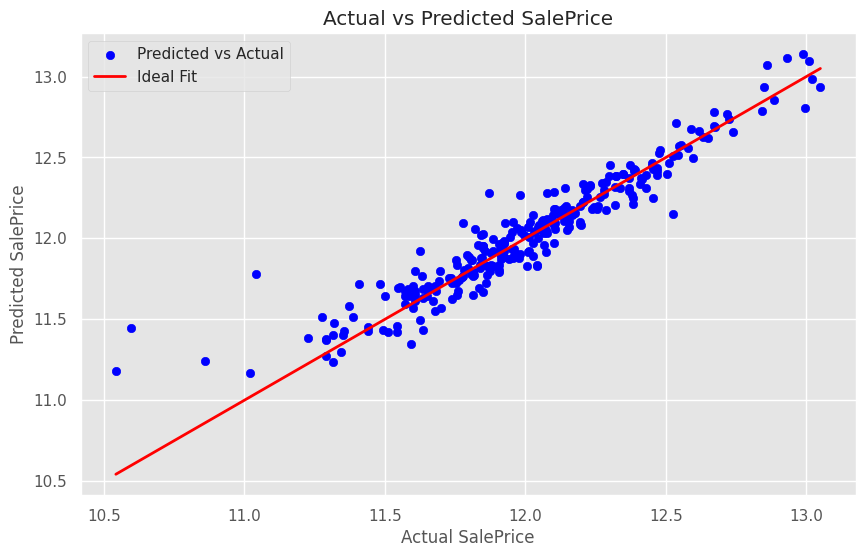

In [151]:
# Initialize the LGBMRegressor
lgbm_regressor = lgb.LGBMRegressor()

# Define the parameter grid for GridSearchCV
param_grid_lgbm = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

# Perform GridSearchCV
lgbm_cv = GridSearchCV(lgbm_regressor, param_grid_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
lgbm_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", lgbm_cv.best_params_)
print("Best score: ", lgbm_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * lgbm_cv.best_score_))
# Get the best estimator
best_lgbm = lgbm_cv.best_estimator_

# Predict on training data
y_train_pred = best_lgbm.predict(X_train)

# Predict on test data
y_test_pred = best_lgbm.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()


Best parameters:  {'depth': 4, 'iterations': 1000, 'learning_rate': 0.05}
Best score:  -0.013215196124390866
Best RMSE:  0.11495736655121701

Training Data Metrics:
Mean Absolute Error:  0.03882141261746389
Mean Squared Error:  0.002536143487190815
Root Mean Squared Error:  0.05036013787898932
R2 Score:  0.9831578967944643

Test Data Metrics:
Mean Absolute Error:  0.07181456255568427
Mean Squared Error:  0.01323859164836788
Root Mean Squared Error:  0.11505907894802513
R2 Score:  0.9162265179802507


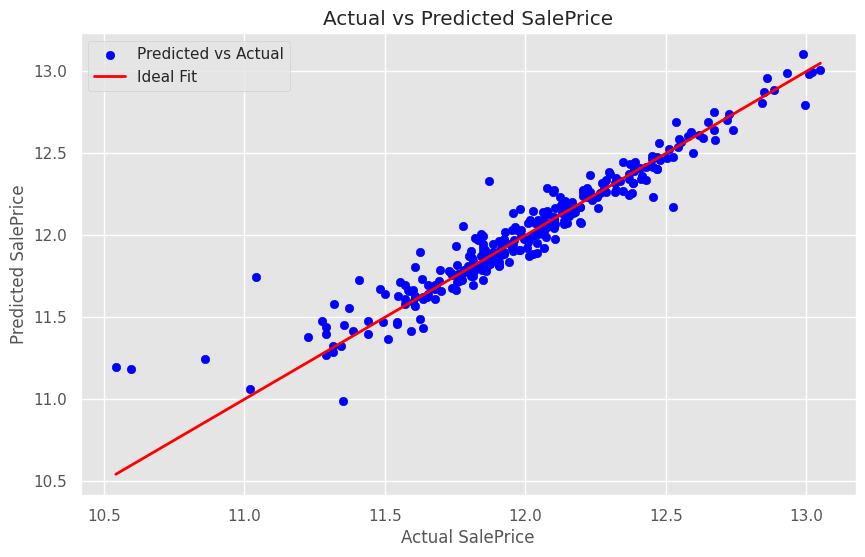

In [152]:
# Initialize the CatBoostRegressor
catboost = CatBoostRegressor(loss_function='RMSE', verbose=False)

# Define the parameter grid for GridSearchCV
param_grid_cat = {
    'iterations': [100, 500, 1000],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

# Perform GridSearchCV
cat_cv = GridSearchCV(catboost, param_grid_cat, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
cat_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", cat_cv.best_params_)
print("Best score: ", cat_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * cat_cv.best_score_))
# Get the best estimator
best_catboost = cat_cv.best_estimator_

# Predict on training data
y_train_pred = best_catboost.predict(X_train)

# Predict on test data
y_test_pred = best_catboost.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()



Training Data Metrics:
Mean Absolute Error:  0.048619700600687155
Mean Squared Error:  0.004597366342370458
Root Mean Squared Error:  0.06780388146979831
R2 Score:  0.9694696617904592

Test Data Metrics:
Mean Absolute Error:  0.07389168732454594
Mean Squared Error:  0.014014764992291987
Root Mean Squared Error:  0.11838397270024345
R2 Score:  0.9113149121691105


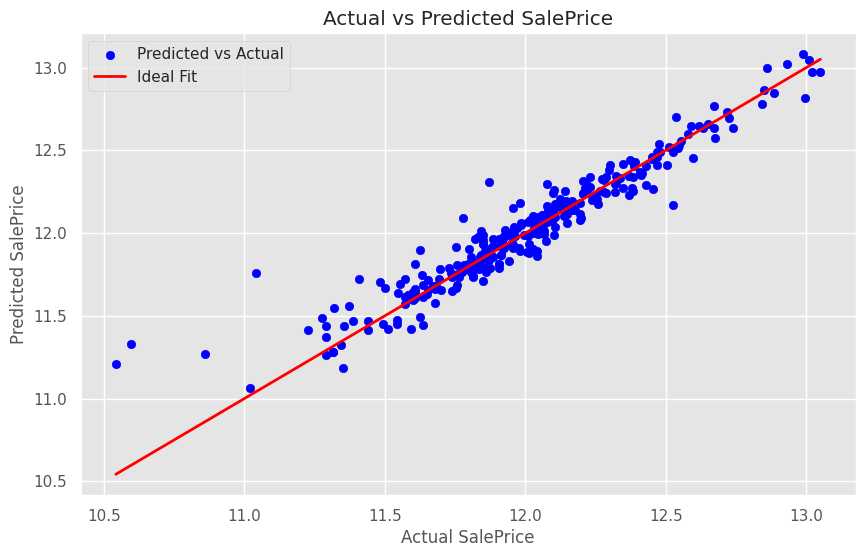

In [153]:
# Initialize the VotingRegressor with the best estimators and weights
vr = VotingRegressor([
    ('gbr', GBR_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('ridge', ridge_cv.best_estimator_)
], weights=[2, 3, 1])

# Fit the model on training data
vr.fit(X_train, y_train)

# Predict on test data
y_pred_vr = vr.predict(X_test)
# Predict on training data
y_train_pred_vr = vr.predict(X_train)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred_vr)
train_mse = mean_squared_error(y_train, y_train_pred_vr)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred_vr)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_pred_vr)
test_mse = mean_squared_error(y_test, y_pred_vr)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred_vr)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_vr, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1994
[LightGBM] [Info] Number of data points in the train set: 1151, number of used features: 112
[LightGBM] [Info] Start training from score 12.023259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1896
[LightGBM] [Info] Number of data points in the train set: 920, number of used features: 106
[LightGBM] [Info] Start training from score 12.032469
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enou

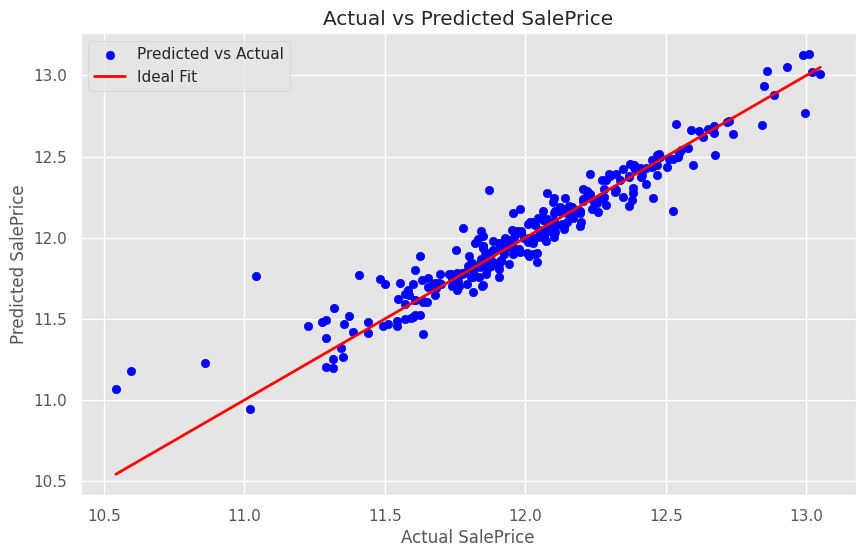

In [154]:
# Define the list of base estimators
estimators = [
    ('gbr', GBR_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('cat', cat_cv.best_estimator_),
    ('lgb', lgbm_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_)
]

# Initialize the StackingRegressor with VotingRegressor as the final estimator
stackreg = StackingRegressor(
    estimators=estimators,
    final_estimator=vr
)

# Fit the model on training data
stackreg.fit(X_train, y_train)

# Predict on test data
y_pred_stackreg = stackreg.predict(X_test)
# Predict on training data
y_train_pred_stackreg = stackreg.predict(X_train)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred_stackreg)
train_mse = mean_squared_error(y_train, y_train_pred_stackreg)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred_stackreg)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_pred_stackreg)
test_mse = mean_squared_error(y_test, y_pred_stackreg)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred_stackreg)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_stackreg, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()


In [167]:
# Define a function to calculate metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Predict on training data
    y_train_pred = model.predict(X_train)

    # Predict on test data
    y_test_pred = model.predict(X_test)

    # Calculate metrics for training data
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Calculate metrics for test data
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    return {
        'Train MAE': train_mae,
        'Train MSE': train_mse,
        'Train RMSE': train_rmse,
        'Train R2': train_r2,
        'Test MAE': test_mae,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test R2': test_r2
    }

# Initialize models
models = {
    'Linear Regression': lr,
    'Decision Tree': dt_cv.best_estimator_,
    'Random Forest': rfr_cv.best_estimator_,
    'K-Nearest Neighbors': knn_cv.best_estimator_,
    'Support Vector Machine':svm_random_search.best_estimator_,
    'Gradient Boosting': GBR_cv.best_estimator_,
    'XGBoost': xgb_cv.best_estimator_,
    'Ridge': ridge_cv.best_estimator_,
    'ElasticNet': en_cv.best_estimator_,
    'Bayesian Ridge': br_cv.best_estimator_,
    'AdaBoost': ada_cv.best_estimator_,
    'LGBM': lgbm_cv.best_estimator_,
    'CatBoost': cat_cv.best_estimator_,
    'Stacking Regressor': stackreg
}

# Create a DataFrame to store results
results = []

# Evaluate each model
for name, model in models.items():
    metrics = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append({'Model': name, **metrics})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
print(results_df)


                     Model  Train MAE  Train MSE  Train RMSE  Train R2  \
0        Linear Regression   0.066062   0.008355    0.091407  0.944515   
1            Decision Tree   0.084674   0.013904    0.117914  0.907668   
2            Random Forest   0.035713   0.002606    0.051053  0.982691   
3      K-Nearest Neighbors   0.000000   0.000000    0.000000  1.000000   
4   Support Vector Machine   0.067250   0.008337    0.091305  0.944638   
5        Gradient Boosting   0.042384   0.003899    0.062440  0.974109   
6                  XGBoost   0.051577   0.004878    0.069845  0.967604   
7                    Ridge   0.069569   0.009192    0.095873  0.938959   
8               ElasticNet   0.074400   0.010658    0.103236  0.929224   
9           Bayesian Ridge   0.069692   0.009227    0.096055  0.938728   
10                AdaBoost   0.105541   0.016582    0.128772  0.889879   
11                    LGBM   0.036804   0.002688    0.051842  0.982152   
12                CatBoost   0.038821 

In [168]:
# Assuming `pipeline` is your preprocessing pipeline and `stackreg` is your trained StackingRegressor

# Step 1: Preprocess the test data
df_test_preprocess = pipeline.transform(test_df)

# Step 2: Predict using the StackingRegressor
y_stacking = stackreg.predict(df_test_preprocess)

# Step 3: Reverse the log transformation if applied during training
# Apply exponential to revert log transformation
y_stacking = np.exp(y_stacking)

# Step 4: Create the output DataFrame
df_y_stacking_out = test_df[['Id']].copy()  # Ensure to copy to avoid setting with copy warning
df_y_stacking_out['SalePrice'] = y_stacking

# Step 5: Save to CSV
df_y_stacking_out.to_csv('Milan_submission.csv', index=False)

print("Submission file created successfully.")


Submission file created successfully.
